In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from datetime import datetime
from unidecode import unidecode
from sklearn.metrics import roc_curve, auc, make_scorer, confusion_matrix, accuracy_score, precision_score

plt.style.use('ggplot')

In [ ]:
#df = pd.read_csv('https://raw.githubusercontent.com/armaacum/data/main/230512_formaciones_oferta_724.csv',encoding='latin1', sep = ';', parse_dates=True)
#df = pd.read_csv('sena.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/armaacum/data/main/archivo_final_3.csv',encoding='latin1', sep = ',', parse_dates=True)

df = pd.read_csv('/content/archivo_final_3.csv',encoding='latin1', sep = ';', parse_dates=True)

In [ ]:
df.columns

Index(['GENERO', 'FECHA_NACIMIENTO', 'ESTADO_CIVIL', 'ESTRATO',
       'COD_PAIS_RESIDENCIA', 'COD_DPTO_RESIDENCIA',
       'COD_MUNICIPIO_RESIDENCIA', 'CODIGO_ESTADO', 'COD_NIVEL_FORMACION',
       'COD_PROGRAMA', 'COD_LINEA_TECNOLÓGICA', 'CÓDIGO_TECNOLOGÍA_DE_RED',
       'FICHA_NUM_CURSO', 'CÓDIGO_REGIONAL', 'CÓDIGO_CENTRO', 'EDAD',
       'CÓDIGO_TIPO_POBLACIÓN', 'APOYO_SOSTNMTO_2018', 'APOYO_SOSTNMTO_2019',
       'APOYO_SOSTNMTO_2020', 'APOYO_SOSTNMTO_2021', 'APOYO_SOSTNMTO_2022',
       'APOYO_SOSTNMTO_2023', 'APOYO_FIC_2018', 'APOYO_FIC_2019',
       'APOYO_FIC_2020', 'APOYO_FIC_2021', 'PUNTAJE_TOTAL', 'FECHA_MATRICULA',
       'FECHA_ULTIMO_ESTADO', 'DURACIÓN_PROGRAMA', 'REGION_RESIDENCIA',
       'R_EDAD', 'DESERCION', 'APOYO', 'R_PUNTAJES', 'DURACION_DIAS'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39102 entries, 0 to 39101
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GENERO                    39102 non-null  object 
 1   FECHA_NACIMIENTO          39102 non-null  object 
 2   ESTADO_CIVIL              39102 non-null  object 
 3   ESTRATO                   39102 non-null  int64  
 4   COD_PAIS_RESIDENCIA       39102 non-null  int64  
 5   COD_DPTO_RESIDENCIA       39102 non-null  int64  
 6   COD_MUNICIPIO_RESIDENCIA  39102 non-null  int64  
 7   CODIGO_ESTADO             39102 non-null  int64  
 8   COD_NIVEL_FORMACION       39102 non-null  int64  
 9   COD_PROGRAMA              39102 non-null  int64  
 10  COD_LINEA_TECNOLÓGICA     39102 non-null  int64  
 11  CÓDIGO_TECNOLOGÍA_DE_RED  39102 non-null  int64  
 12  FICHA_NUM_CURSO           39102 non-null  int64  
 13  CÓDIGO_REGIONAL           39102 non-null  int64  
 14  CÓDIGO

In [ ]:
df.columns = [unidecode(column) for column in df.columns]

In [ ]:
df.head(5)

GENERO FECHA_NACIMIENTO ESTADO_CIVIL  ESTRATO  COD_PAIS_RESIDENCIA  \
0      M       21/04/2001      SOLTERO        2                   57   
1      M        3/07/2000      SOLTERO        2                   57   
2      F        3/06/2000      SOLTERO        2                   57   
3      F       30/05/2000      SOLTERO        2                   57   
4      M       26/03/1995   NO REPORTA        2                   57   

   COD_DPTO_RESIDENCIA  COD_MUNICIPIO_RESIDENCIA  CODIGO_ESTADO  \
0                57066                  57066001              3   
1                57066                  57066001              3   
2                57066                  57066001              3   
3                57066                  57066170              3   
4                57066                  57066170              3   

   COD_NIVEL_FORMACION  COD_PROGRAMA  ...  PUNTAJE_TOTAL  FECHA_MATRICULA  \
0                    2        122703  ...          89.13       18/12/2017   
1                    2        122703  ...          87.27       18/12/2017   
2                    2        122703  ...          88.06       18/12/2017   
3                    2        122703  ...          88.00       18/12/2017   
4                    2        122703  ...          87.85       18/12/2017   

   FECHA_ULTIMO_ESTADO  DURACION_PROGRAMA  REGION_RESIDENCIA        R_EDAD  \
0           19/02/2019                 12       EJE_CAFETERO  ADOLESCENCIA   
1            2/08/2019                 12       EJE_CAFETERO  ADOLESCENCIA   
2            2/08/2019                 12       EJE_CAFETERO  ADOLESCENCIA   
3            2/08/2019                 12       EJE_CAFETERO  ADOLESCENCIA   
4            2/11/2019                 12       EJE_CAFETERO      JUVENTUD   

   DESERCION  APOYO  R_PUNTAJES  DURACION_DIAS  
0          0      0      80-100            264  
1          0      0      80-100            264  
2          0      0      80-100            264  
3          0      0      80-100            264  
4          0      0      80-100            264  

[5 rows x 37 columns]

In [ ]:
#dates = pd.to_datetime(df['FECHA_NACIMIENTO'], format='%d/%m/%Y')
dates = pd.to_datetime(df['FECHA_NACIMIENTO'], format='%d/%m/%Y')

date_ref = pd.to_datetime(df['FECHA_MATRICULA'], format='%d/%m/%Y')
#date_ref = pd.to_datetime(df['FECHA_MATRICULA'], format='%Y/%m/%d')
df['EDAD_MATRICULA'] =((date_ref - dates) / pd.Timedelta(days=365.25)).round().astype(int)

df.insert(df.columns.get_loc('FECHA_NACIMIENTO') + 1, 'EDAD_MATRICULA', df.pop('EDAD_MATRICULA'))
df.head(5)

GENERO FECHA_NACIMIENTO  EDAD_MATRICULA ESTADO_CIVIL  ESTRATO  \
0      M       21/04/2001              17      SOLTERO        2   
1      M        3/07/2000              17      SOLTERO        2   
2      F        3/06/2000              18      SOLTERO        2   
3      F       30/05/2000              18      SOLTERO        2   
4      M       26/03/1995              23   NO REPORTA        2   

   COD_PAIS_RESIDENCIA  COD_DPTO_RESIDENCIA  COD_MUNICIPIO_RESIDENCIA  \
0                   57                57066                  57066001   
1                   57                57066                  57066001   
2                   57                57066                  57066001   
3                   57                57066                  57066170   
4                   57                57066                  57066170   

   CODIGO_ESTADO  COD_NIVEL_FORMACION  ...  PUNTAJE_TOTAL  FECHA_MATRICULA  \
0              3                    2  ...          89.13       18/12/2017   
1              3                    2  ...          87.27       18/12/2017   
2              3                    2  ...          88.06       18/12/2017   
3              3                    2  ...          88.00       18/12/2017   
4              3                    2  ...          87.85       18/12/2017   

   FECHA_ULTIMO_ESTADO  DURACION_PROGRAMA  REGION_RESIDENCIA        R_EDAD  \
0           19/02/2019                 12       EJE_CAFETERO  ADOLESCENCIA   
1            2/08/2019                 12       EJE_CAFETERO  ADOLESCENCIA   
2            2/08/2019                 12       EJE_CAFETERO  ADOLESCENCIA   
3            2/08/2019                 12       EJE_CAFETERO  ADOLESCENCIA   
4            2/11/2019                 12       EJE_CAFETERO      JUVENTUD   

   DESERCION  APOYO  R_PUNTAJES  DURACION_DIAS  
0          0      0      80-100            264  
1          0      0      80-100            264  
2          0      0      80-100            264  
3          0      0      80-100            264  
4          0      0      80-100            264  

[5 rows x 38 columns]

In [ ]:
df['EDAD']

0        17
1        17
2        17
3        17
4        23
         ..
39097    17
39098    20
39099    23
39100    27
39101    37
Name: EDAD, Length: 39102, dtype: int64

### __1.2 Distribución por edades entre hombres y mujeres:__

In [ ]:
df['GENERO'].value_counts()

GENERO
F    20044
M    19058
Name: count, dtype: int64

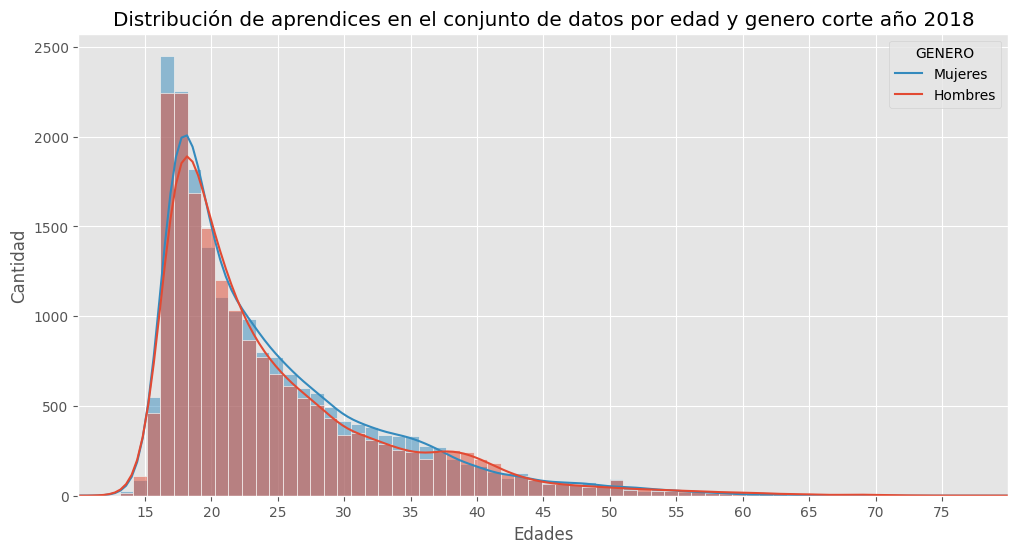

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='EDAD', bins=81, kde=True, color='r', hue=df['GENERO'])
plt.xlabel('Edades')
plt.ylabel('Cantidad')
plt.title('Distribución de aprendices en el conjunto de datos por edad y genero corte año 2018')
plt.legend(title='GENERO', labels=['Mujeres', 'Hombres'])
plt.xticks(range(15, 80, 5))
plt.xlim(10, 80)
plt.show()

### __1.3 Cantidad de registros de aprendices que desertaron por edad y genero:__

* __Deserción general:__

In [ ]:
df['DESERCION'].value_counts()

DESERCION
0    23240
1    15862
Name: count, dtype: int64

* __Deserción por genero:__

In [ ]:
df.groupby('DESERCION')['GENERO'].value_counts()

DESERCION  GENERO
0          F         12412
           M         10828
1          M          8230
           F          7632
Name: count, dtype: int64

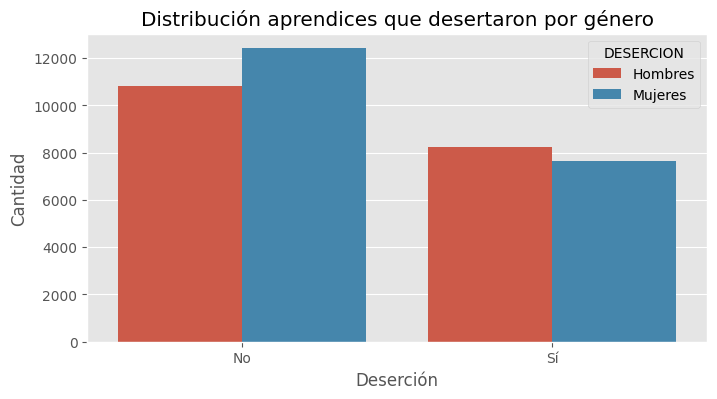

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='DESERCION', hue=df['GENERO'])
plt.xlabel('Deserción')
plt.ylabel('Cantidad')
plt.title('Distribución aprendices que desertaron por género')
plt.legend(title='DESERCION', labels=['Hombres', 'Mujeres'])
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

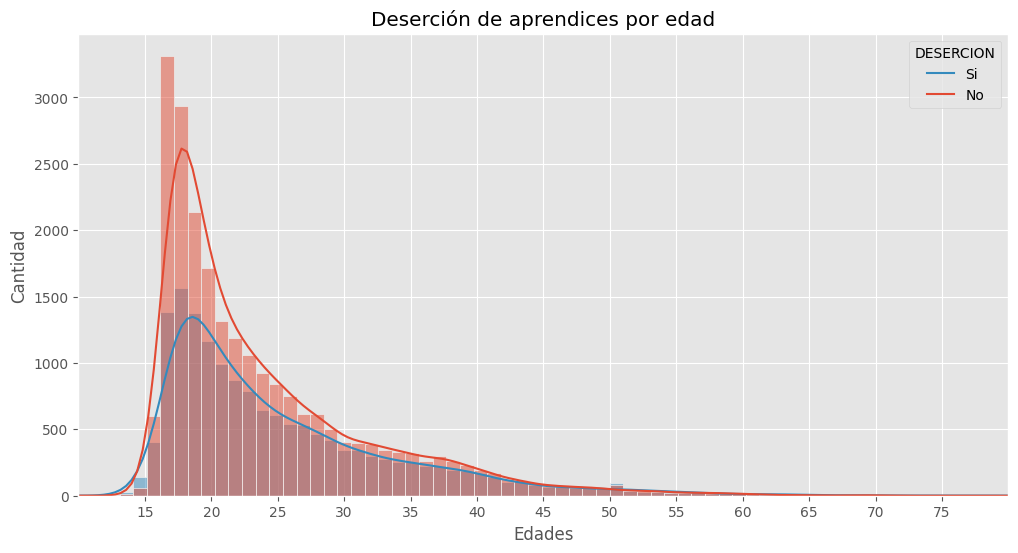

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='EDAD', bins=81, kde=True, color='r', hue=df['DESERCION'])
plt.xlabel('Edades')
plt.ylabel('Cantidad')
plt.title('Deserción de aprendices por edad')
plt.xticks(range(15, 80, 5))
plt.xlim(10, 80)
plt.legend(title='DESERCION', labels=['Si', 'No'])
plt.show()

### __1.4 Se observa una deserción mayor entre los aprendices mas jovenes, se procede a visualizar su distribución:__

* __Se agrupa por deserción en el rango iguales o menores a 20 años__

In [ ]:
df[df['EDAD_MATRICULA'] <= 20].groupby('DESERCION')['EDAD_MATRICULA'].value_counts()

DESERCION  EDAD_MATRICULA
0          18                3057
           17                2906
           19                2287
           20                1773
           16                 411
           15                  40
           14                   8
           13                   1
1          18                1538
           19                1433
           17                1242
           20                1196
           16                 316
           15                 111
           14                  23
           13                   2
           9                    1
Name: count, dtype: int64

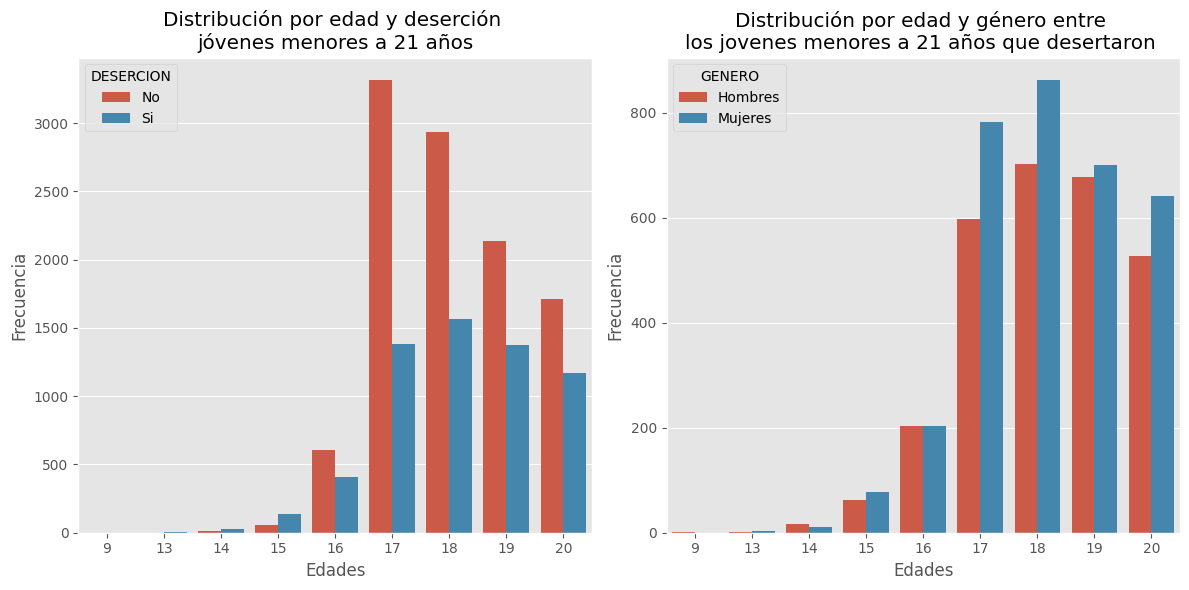

In [ ]:
df_fil = [df[df['EDAD'] <= 20], df[(df['EDAD'] <= 20) & (df['DESERCION'] == 1)]]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
variables = ['DESERCION', 'GENERO']
titulos = ['Distribución por edad y deserción \njóvenes menores a 21 años',
           'Distribución por edad y género entre \nlos jovenes menores a 21 años que desertaron ']
legends = [['No', 'Si'], ['Hombres', 'Mujeres']]
for i, ax in enumerate(axes):
    sns.countplot(data=df_fil[i], x='EDAD', hue=variables[i], ax=ax)
    ax.set_xlabel('Edades')
    ax.set_ylabel('Frecuencia')
    ax.set_title(titulos[i])
    ax.legend(title=variables[i], labels=legends[i], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['GENERO', 'FECHA_NACIMIENTO', 'EDAD_MATRICULA', 'ESTADO_CIVIL',
       'ESTRATO', 'COD_PAIS_RESIDENCIA', 'COD_DPTO_RESIDENCIA',
       'COD_MUNICIPIO_RESIDENCIA', 'CODIGO_ESTADO', 'COD_NIVEL_FORMACION',
       'COD_PROGRAMA', 'COD_LINEA_TECNOLOGICA', 'CODIGO_TECNOLOGIA_DE_RED',
       'FICHA_NUM_CURSO', 'CODIGO_REGIONAL', 'CODIGO_CENTRO', 'EDAD',
       'CODIGO_TIPO_POBLACION', 'APOYO_SOSTNMTO_2018', 'APOYO_SOSTNMTO_2019',
       'APOYO_SOSTNMTO_2020', 'APOYO_SOSTNMTO_2021', 'APOYO_SOSTNMTO_2022',
       'APOYO_SOSTNMTO_2023', 'APOYO_FIC_2018', 'APOYO_FIC_2019',
       'APOYO_FIC_2020', 'APOYO_FIC_2021', 'PUNTAJE_TOTAL', 'FECHA_MATRICULA',
       'FECHA_ULTIMO_ESTADO', 'DURACION_PROGRAMA', 'REGION_RESIDENCIA',
       'R_EDAD', 'DESERCION', 'APOYO', 'R_PUNTAJES', 'DURACION_DIAS'],
      dtype='object')

In [ ]:
df_categorical = df[['GENERO', 'ESTADO_CIVIL', 'ESTRATO', 'COD_PAIS_RESIDENCIA', 'COD_DPTO_RESIDENCIA', 'COD_MUNICIPIO_RESIDENCIA',
                     'CODIGO_ESTADO', 'COD_NIVEL_FORMACION', 'COD_PROGRAMA', 'COD_LINEA_TECNOLOGICA', 'CODIGO_TECNOLOGIA_DE_RED',
                     'CODIGO_TIPO_POBLACION', 'APOYO_SOSTNMTO_2018', 'APOYO_SOSTNMTO_2019', 'APOYO_SOSTNMTO_2020', 'APOYO_FIC_2018',
                     'APOYO_FIC_2019', 'APOYO_FIC_2020', 'REGION_RESIDENCIA', 'R_EDAD', 'DESERCION', 'APOYO', 'R_PUNTAJES', 'FICHA_NUM_CURSO','DURACION_PROGRAMA','PUNTAJE_TOTAL']]
df_categorical.head(5)

GENERO ESTADO_CIVIL  ESTRATO  COD_PAIS_RESIDENCIA  COD_DPTO_RESIDENCIA  \
0      M      SOLTERO        2                   57                57066   
1      M      SOLTERO        2                   57                57066   
2      F      SOLTERO        2                   57                57066   
3      F      SOLTERO        2                   57                57066   
4      M   NO REPORTA        2                   57                57066   

   COD_MUNICIPIO_RESIDENCIA  CODIGO_ESTADO  COD_NIVEL_FORMACION  COD_PROGRAMA  \
0                  57066001              3                    2        122703   
1                  57066001              3                    2        122703   
2                  57066001              3                    2        122703   
3                  57066170              3                    2        122703   
4                  57066170              3                    2        122703   

   COD_LINEA_TECNOLOGICA  ...  APOYO_FIC_2019  APOYO_FIC_2020  \
0                      5  ...               0               0   
1                      5  ...               0               0   
2                      5  ...               0               0   
3                      5  ...               0               0   
4                      5  ...               0               0   

   REGION_RESIDENCIA        R_EDAD  DESERCION  APOYO  R_PUNTAJES  \
0       EJE_CAFETERO  ADOLESCENCIA          0      0      80-100   
1       EJE_CAFETERO  ADOLESCENCIA          0      0      80-100   
2       EJE_CAFETERO  ADOLESCENCIA          0      0      80-100   
3       EJE_CAFETERO  ADOLESCENCIA          0      0      80-100   
4       EJE_CAFETERO      JUVENTUD          0      0      80-100   

   FICHA_NUM_CURSO DURACION_PROGRAMA PUNTAJE_TOTAL  
0          1580728                12         89.13  
1          1580728                12         87.27  
2          1580728                12         88.06  
3          1580728                12         88.00  
4          1580728                12         87.85  

[5 rows x 26 columns]

In [ ]:
df['APOYO_FIC_2021'].value_counts()

APOYO_FIC_2021
0    39102
Name: count, dtype: int64

In [ ]:
dates = pd.to_datetime(df['FECHA_NACIMIENTO'], format='%d/%m/%Y')
date_ref = pd.to_datetime(df['FECHA_MATRICULA'], format='%d/%m/%Y')
#date_ref = pd.to_datetime(df['FECHA_MATRICULA'], format='%Y/%m/%d')


df['EDAD_MATRICULA'] = ((date_ref - dates) / pd.Timedelta(days=365.25)).round().astype(int)

# Se inserta la columna justo despues de la fecha de nacimiento:
df.insert(df.columns.get_loc('FECHA_NACIMIENTO') + 1, 'EDAD_MATRICULA', df.pop('EDAD_MATRICULA'))
df.head(5)

GENERO FECHA_NACIMIENTO  EDAD_MATRICULA ESTADO_CIVIL  ESTRATO  \
0      M       21/04/2001              17      SOLTERO        2   
1      M        3/07/2000              17      SOLTERO        2   
2      F        3/06/2000              18      SOLTERO        2   
3      F       30/05/2000              18      SOLTERO        2   
4      M       26/03/1995              23   NO REPORTA        2   

   COD_PAIS_RESIDENCIA  COD_DPTO_RESIDENCIA  COD_MUNICIPIO_RESIDENCIA  \
0                   57                57066                  57066001   
1                   57                57066                  57066001   
2                   57                57066                  57066001   
3                   57                57066                  57066170   
4                   57                57066                  57066170   

   CODIGO_ESTADO  COD_NIVEL_FORMACION  ...  PUNTAJE_TOTAL  FECHA_MATRICULA  \
0              3                    2  ...          89.13       18/12/2017   
1              3                    2  ...          87.27       18/12/2017   
2              3                    2  ...          88.06       18/12/2017   
3              3                    2  ...          88.00       18/12/2017   
4              3                    2  ...          87.85       18/12/2017   

   FECHA_ULTIMO_ESTADO  DURACION_PROGRAMA  REGION_RESIDENCIA        R_EDAD  \
0           19/02/2019                 12       EJE_CAFETERO  ADOLESCENCIA   
1            2/08/2019                 12       EJE_CAFETERO  ADOLESCENCIA   
2            2/08/2019                 12       EJE_CAFETERO  ADOLESCENCIA   
3            2/08/2019                 12       EJE_CAFETERO  ADOLESCENCIA   
4            2/11/2019                 12       EJE_CAFETERO      JUVENTUD   

   DESERCION  APOYO  R_PUNTAJES  DURACION_DIAS  
0          0      0      80-100            264  
1          0      0      80-100            264  
2          0      0      80-100            264  
3          0      0      80-100            264  
4          0      0      80-100            264  

[5 rows x 38 columns]

In [ ]:
(df.EDAD - df.EDAD_MATRICULA).value_counts()

 0    32017
-1     7010
-2       66
-3        9
Name: count, dtype: int64

In [ ]:
df['DURACION_PROGRAMA'].value_counts()

DURACION_PROGRAMA
12      18821
24       9822
2200     4210
2208     1847
2640     1212
864       888
6         502
1296      494
1760      360
880       340
3940      245
1026      171
3960       68
432        65
18         30
30         27
Name: count, dtype: int64

In [ ]:
diccionario_ciudades = {57066: 'RISARALDA', 57017: 'CALDAS', 57073: 'TOLIMA', 57011: 'BOGOTÁ D.C.', 57050: 'META', 57068: 'SANTANDER', 57015: 'BOYACÁ', 57019: 'CAUCA', 57020: 'CESAR', 57023: 'CÓRDOBA', 57013: 'BOLÍVAR', 57047: 'MAGDALENA', 57008: 'ATLÁNTICO', 57025: 'CUNDINAMARCA', 57076: 'VALLE DEL CAUCA', 57005: 'ANTIOQUIA', 57081: 'ARAUCA', 57085: 'CASANARE', 57018: 'CAQUETÁ', 57054: 'NORTE DE SANTANDER', 57099: 'VICHADA', 57086: 'PUTUMAYO', 57052: 'NARIÑO', 147013: 'FLORIDA', 57070: 'SUCRE', 57088: 'SAN ANDRÉS Y PROVIDENCIA', 57094: 'GUAINÍA', 57044: 'LA GUAJIRA', 57063: 'QUINDÍO', 57027: 'CHOCÓ', 57041: 'HUILA', 351015: 'SETÚBAL', 39070: 'ANCONA', 57095: 'GUAVIARE', 57091: 'AMAZONAS', 34014: 'ASTURIAS', 32001: 'BRUSELAS', 57097: 'VAUPÉS', 58003: 'APURE', 58019: 'TÁCHIRA', 51013: 'LIMA', 61006: 'VICTORIA', 49010: 'RENANIA SEPTENTRIONAL-WESTFALIA', 593020: 'PICHINCHA', 56009: 'IX LA ARAUCANÍA', 54008: 'DISTRITO FEDERAL', 34051: 'MADRID', 56013: 'REGIÓN METROPOLITANA DE SANTIAGO', 40041: 'BUCAREST', 34046: 'A CORUÑA', 56004: 'IV COQUIMBO', 52008: 'DURANGO'}
diccionario_programas = {122703: 'COMERCIO INTERNACIONAL', 122115: 'GESTIÓN ADMINISTRATIVA', 133146: 'CONTABILIZACIÓN DE OPERACIONES COMERCIALES Y FINANCIERAS', 122814: 'OPERACIÓN DE EVENTOS', 723111: 'CULTIVO Y COSECHA DE LA PALMA DE ACEITE', 632215: 'COMERCIALIZACIÓN DE ALIMENTOS', 137126: 'LOGÍSTICA EMPRESARIAL', 137108: 'DESARROLLO DE OPERACIONES LOGÍSTICA EN LA CADENA DE ABASTECIMIENTO', 525201: 'ACTIVIDAD FÍSICA', 821303: 'INSTALACIONES HIDRÁULICAS SANITARIAS Y DE GAS', 631110: 'VENTA DE PRODUCTOS Y SERVICIOS', 122121: 'ASISTENCIA ADMINISTRATIVA', 121502: 'GESTIÓN PORTUARIA', 838105: 'MANTENIMIENTO DE MOTORES GASOLINA Y GAS', 525203: 'ENTRENAMIENTO DEPORTIVO', 322201: 'SALUD ORAL', 935240: 'TRAZO Y CORTE EN CONFECCIÓN INDUSTRIAL', 821605: 'MANTENIMIENTO DEL CONJUNTO TRANSMISOR DE POTENCIA CONTROL Y SEGURIDAD DE AUTOMOTORES', 836114: 'CONSTRUCCIÓN DE EDIFICACIONES', 722303: 'GESTIÓN SOSTENIBLE DE LA BIODIVERSIDAD VEGETAL', 112005: 'GESTIÓN DEL TALENTO HUMANO', 137201: 'COMPRAS Y SUMINISTROS', 121101: 'GESTION DE PROCESOS ADMINISTRATIVOS DE SALUD', 939401: 'PRODUCCIÓN CON POLIÉSTER REFORZADO', 936161: 'AGROINDUSTRIA ALIMENTARIA', 838201: 'MANTENIMIENTO ELÉCTRICO Y ELECTRÓNICO EN AUTOMOTORES', 522202: 'ELABORACIÓN DE AUDIOVISUALES', 937116: 'IMPRESIÓN SERIGRÁFICA', 134401: 'ASISTENCIA EN ORGANIZACIÓN DE ARCHIVOS', 123303: 'GESTIÓN INTEGRAL DEL RIESGO EN SEGUROS', 222114: 'ALISTAMIENTO DE LABORATORIOS DE MICROBIOLOGIA Y BIOTECNOLOGIA', 122317: 'RECURSOS HUMANOS', 221111: 'QUÍMICA APLICADA A LA INDUSTRIA', 522201: 'OPERACIÓN DE CÁMARAS Y LUCES DE TELEVISIÓN', 935153: 'MANEJO DE MÁQUINAS DE CONFECCIÓN INDUSTRIAL PARA JEAN', 632305: 'OPERACIONES DE CAJA Y SERVICIOS EN ALMACENES DE CADENA', 664101: 'SERVICIOS DE APOYO AL CLIENTE', 525202: 'DIRECCIÓN TÉCNICA DE FÚTBOL', 133202: 'ASESORÍA COMERCIAL Y OPERACIONES DE ENTIDADES FINANCIERAS', 722123: 'PRODUCCIÓN AGRÍCOLA', 323401: 'DESARROLLO Y ADAPTACIÓN DE PROTESIS Y ORTESIS', 821202: 'SUPERVISIÓN DE REDES DE DISTRIBUCIÓN DE ENERGÍA ELÉCTRICA', 723106: 'PRODUCCIÓN GANADERA', 226234: 'MANEJO AMBIENTAL', 623327: 'GESTIÓN INTEGRAL EN FONDOS DE PENSIONES Y CESANTÍAS', 836121: 'MAMPOSTERÍA', 621201: 'GESTIÓN EMPRESARIAL', 135304: 'INFORMACIÓN TURÍSTICA', 845101: 'MECÁNICA RURAL', 921219: 'OPERACIÓN DE SISTEMAS DE POTABILIZACIÓN DE AGUA', 723402: 'ACUICULTURA', 521213: 'GESTIÓN DOCUMENTAL', 228185: 'SISTEMAS', 936167: 'ALISTAMIENTO Y OPERACIÓN DE MAQUINARIA PARA LA PRODUCCIÓN INDUSTRIAL', 512101: 'ESCRITURA PARA PRODUCTOS AUDIOVISUALES', 122133: 'GESTIÓN DE NEGOCIOS', 935502: 'CONTROL DE CALIDAD EN CONFECCIÓN', 835106: 'CARPINTERÍA', 222110: 'PROCESOS BIOTECNOLÓGICOS APLICADOS A LA INDUSTRIA', 522203: 'CÁMARA Y FOTOGRAFÍA PARA CINE', 228181: 'MANTENIMIENTO DE EQUIPOS DE COMPUTO, DISEÑO E INSTALACION DE CABLEADO ESTRUCTURADO', 832223: 'INSTALACIONES ELÉCTRICAS EN BAJA TENSIÓN', 180201: 'MANEJO INTEGRAL DE RESIDUOS SÓLIDOS', 662121: 'COCINA', 821226: 'DISEÑO, IMPLEMENTACIÓN Y MANTENIMIENTO DE SISTEMAS DE TELECOMUNICACIONES', 961520: 'PROCESOS DE PANADERIA', 635311: 'MESA Y BAR', 935156: 'MANEJO DE MÁQUINAS DE CONFECCIÓN INDUSTRIAL PARA ROPA INTERIOR Y DEPORTIVA', 221109: 'ANÁLISIS DE MUESTRAS QUÍMICAS', 838104: 'MANTENIMIENTO DE MOTORES DIESEL', 633409: 'SERVICIOS DE ALOJAMIENTO', 225117: 'DISEÑO DE PRODUCTOS INDUSTRIALES', 847302: 'ADMINISTRACIÓN DEL SERVICIO DE TRANSPORTE INDIVIDUAL DE PASAJEROS', 845110: 'OPERACIÓN DE MAQUINARIA PESADA PARA EXCAVACIÓN', 417510: 'SISTEMAS DE GESTION AMBIENTAL', 723105: 'GESTIÓN DE EMPRESAS AGROPECUARIAS', 225208: 'DIBUJO ARQUITECTÓNICO', 621203: 'GESTIÓN COMERCIAL DE SERVICIOS', 921226: 'PROCESOS DE LA INDUSTRIA QUÍMICA', 228120: 'PROGRAMACION DE SOFTWARE', 524201: 'DECORACIÓN DE ESPACIOS INTERIORES', 836222: 'CONSTRUCCIÓN DE VIAS', 833210: 'GESTIÓN PARA EL SUMINISTRO GASES COMBUSTIBLES Y NO COMBUSTIBLES', 224303: 'INSTRUMENTACION INDUSTRIAL', 841102: 'CARPINTERÍA DE ALUMINIO', 848202: 'MECÁNICA NAVAL', 935306: 'PRODUCCION DE CALZADO', 733171: 'PRODUCCIÓN DE CAFÉS ESPECIALES', 635503: 'COCINA.', 834257: 'SOLDADURA DE PRODUCTOS METÁLICOS (PLATINA)', 513208: 'COORDINACIÓN DE ESCUELAS DE MÚSICA', 635402: 'SERVICIOS DE BARTENDER', 522705: 'SONIDO DIRECTO PARA PRODUCCIÓN DE MEDIOS AUDIOVISUALES', 225210: 'DESARROLLO GRAFICO DE PROYECTOS DE ARQUITECTURA E INGENIERIA', 839312: 'MANTENIMIENTO DE EQUIPOS DE COMPUTO.', 513507: 'ACTUACIÓN', 228183: 'GESTION DE REDES DE DATOS', 632221: 'VENTAS Y MERCHANDISING', 635239: 'PANIFICACION', 525213: 'ENTRENAMIENTO FISICO PERSONALIZADO', 821240: 'GESTION PARA EL USO EFICIENTE DE LA ENERGIA ELECTRICA', 733193: 'SISTEMAS AGROPECUARIOS ECOLOGICOS.', 511312: 'GESTION DE DOCUMENTOS ELECTRONICOS', 822203: 'LOGÍSTICA DEL TRANSPORTE', 836221: 'CONSTRUCCIÓN DE ESTRUCTURAS EN CONCRETO', 524504: 'PATRONAJE INDUSTRIAL DE PRENDAS DE VESTIR', 524109: 'ANIMACION 3D', 722142: 'AGROBIOTECNOLOGÍA', 733190: 'PRODUCCION Y COSECHA DE CULTIVO DE CACAO', 221113: 'ALISTAMIENTO DE LABORATORIOS DE ANALISIS Y ENSAYOS', 935310: 'GUARNICIÓN DE CALZADO', 733410: 'PRODUCCION AGROPECUARIA', 511105: 'GESTIÓN BIBLIOTECARIA', 935175: 'CONFECCION INDUSTRIAL DE ROPA EXTERIOR', 634214: 'ANIMACION TURISTICA', 832418: 'INSTALACION DE REDES DE COMPUTADORES', 733191: 'PROMOCION DE SEGURIDAD ALIMENTARIA', 513601: 'ANIMACION DIGITAL', 733291: 'PRODUCCION PORCINA.', 821225: 'CONSTRUCCION Y MONTAJE DE INSTALACIONES ELECTRICAS', 525209: 'EJECUCION DE CLASES GRUPALES ORIENTADAS AL FITNESS', 133516: 'NOMINA Y PRESTACIONES SOCIALES', 122145: 'DIAGNOSTICO Y ANALISIS ORGANIZACIONAL PARA UNIDADES PRODUCTIVAS', 222313: 'PRODUCCION Y CONSUMO SOSTENIBLE', 831104: 'MECANIZADO DE PRODUCTOS METALMECANICOS', 832221: 'INSTALACIONES ELECTRICAS RESIDENCIALES', 224222: 'IMPLEMENTACION Y MANTENIMIENTO DE EQUIPOS ELECTRONICOS INDUSTRIALES', 837530: 'MANTENIMIENTO DE EQUIPOS DE REFRIGERACION, VENTILACION Y CLIMATIZACION', 664210: 'EJECUCION DE PROGRAMAS DEPORTIVOS', 663202: 'SERVICIOS DE ALIMENTACION Y LIMPIEZA', 936181: 'PROCESAMIENTO DE LACTEOS', 723166: 'GESTION DE ASISTENCIA TECNICA AGROPECUARIA', 834105: 'TRAZADO, CORTE Y ARMADO EN LAMINAS, PERFILES Y TUBERIAS', 122320: 'GESTION DE TALENTO HUMANO POR COMPETENCIAS - METODOLOGIA', 921232: 'SUPERVISION DE BUENAS PRACTICAS DE MANUFACTURA', 836130: 'MANTENIMIENTO Y REPARACION DE EDIFICACIONES', 513101: 'PRODUCCION DE MEDIOS AUDIOVISUALES DIGITALES', 733174: 'CULTIVOS AGRICOLAS', 722125: 'SUPERVISION DE ACTIVIDADES BANANERAS', 637214: 'ATENCION INTEGRAL A LA PRIMERA INFANCIA.', 761321: 'PRODUCCION DE CAFE', 836131: 'CONSTRUCCION DE ESTRUCTURAS EN GUADUA.', 821222: 'ELECTRICIDAD INDUSTRIAL', 932216: 'TRANSFORMACION DE POLIMEROS POR EXTRUSION DE PERFILES', 228187: 'IMPLEMENTACION DE SOLUCIONES DE TELEFONIA IP.', 121202: 'GESTIÓN BANCARIA Y DE ENTIDADES FINANCIERAS', 217218: 'SEGURIDAD EN REDES DE COMPUTADORES', 513303: 'EJECUCION MUSICAL CON INSTRUMENTOS FUNCIONALES', 217219: 'GESTION Y SEGURIDAD DE BASES DE DATOS', 837151: 'MANTENIMIENTO DE MAQUINAS DE CONFECCION INDUSTRIAL', 217317: 'DESARROLLO DE APLICACIONES PARA DISPOSITIVOS MOVILES.', 845113: 'EXCAVADORA Y RETROCARGADORA', 524139: 'DISEÑO E INTEGRACION DE MULTIMEDIA', 524436: 'ELABORACION DE OBJETOS ARTESANALES CON RECURSOS MADERABLES', 635170: 'CORTE Y VENTA DE CARNES.', 637307: 'PELUQUERIA.', 822206: 'SEGURIDAD VIAL,CONTROL DE TRANSITO Y TRANSPORTE', 634215: 'RECREACION COMUNITARIA', 837126: 'MECANICO DE MAQUINARIA INDUSTRIAL', 733450: 'MAYORDOMIA DE EMPRESAS GANADERAS', 834401: 'CARPINTERIA METALICA', 842405: 'JOYERIA ARMADA', 331120: 'ENFERMERIA.', 637321: 'CUIDADO ESTETICO DE MANOS Y PIES.', 214506: 'IMPLEMENTACION DE SISTEMAS DE INFORMACION GEOGRAFICA', 841105: 'CONSTRUCCIONES LIVIANAS EN SECO', 222239: 'CONSERVACION DE RECURSOS NATURALES', 761328: 'LABORES DE CAMPO EN CULTIVOS', 832424: 'INSTALACION DE REDES INTERNAS DE TELECOMUNICACIONES', 849205: 'MANEJO DE MONTACARGAS', 838314: 'MANTENIMIENTO DE LAS MOTOCICLETAS', 733451: 'PROYECTOS AGROPECUARIOS', 223130: 'LABORATORIO DE SUELOS.', 848204: 'MARINERO QUE FORME PARTE DE LA GUARDIA EN UNA CAMARA DE MAQUINAS. REGLA III/4 STCW/78 ENMENDADO. NIVEL APOYO.', 525307: 'JUZGAMIENTO Y REGLAMENTACION DEPORTIVA', 524433: 'ARTESANIAS TRADICIONALES EN TEJIDO DE PUNTO', 331308: 'SALUD PUBLICA', 733293: 'PRODUCCION ACUICOLA.', 839101: 'MANTENIMIENTO DE EQUIPOS ELECTRONICOS DE CONSUMO MASIVO EN AUDIO Y VIDEO', 522101: 'PRODUCCION DE FOTOGRAFIA PUBLICITARIA', 837152: 'MONTAJE Y MANTENIMIENTO ELECTROMECANICO DE INSTALACIONES MINERAS BAJO TIERRA', 637303: 'COSMETOLOGIA Y ESTETICA INTEGRAL.', 833317: 'INSTALACIONES PARA SUMINISTRO DE GAS COMBUSTIBLE EN EDIFICACIONES RESIDENCIALES Y COMERCIALES', 832333: 'MANTENIMIENTO E INSTALACION DE SISTEMAS SOLARES FOTOVOLTAICOS', 931501: 'INSPECCION Y ENSAYOS CON PROCESOS NO DESTRUCTIVOS', 733290: 'PRODUCCION PECUARIA.', 621121: 'DISEÑO Y DESARROLLO DE INVESTIGACIONES DE MERCADO', 621123: 'TRADE MARKETING', 821239: 'LUMINOTECNIA..', 331505: 'SERVICIOS FARMACEUTICOS', 135302: 'GESTION COMERCIAL Y TELEMERCADEO EN CONTACT CENTER', 522711: 'EXPRESION PARA LAS ARTES ESCENICAS', 223247: 'MANTENIMIENTO DE AUTOMATISMOS INDUSTRIALES', 661202: 'ALMACENAMIENTO,EMPAQUE Y EMBALAJE DE OBJETOS.', 513407: 'EXPRESION DANCISTICA', 937131: 'IMPRESION DIGITAL.', 226304: 'SUPERVISION PARA OBRAS CIVILES', 524149: 'ILUSTRACION CREATIVA', 621125: 'MARKETING PARA SERVICIOS HOTELEROS', 832415: 'INSTALACION DE REDES HIBRIDAS DE FIBRA OPTICA Y COAXIAL', 664209: 'EJECUCION DE EVENTOS DEPORTIVOS Y RECREATIVOS', 832422: 'INSTALACION Y REPARACION DE RED DE FIBRA OPTICA', 731320: 'LABORES SUBTERRANEAS', 832336: 'MONTAJE Y MANTENIMIENTO DE REDES AEREAS DE DISTRIBUCION DE ENERGIA ELECTRICA', 721112: 'CONTROL EN SISTEMAS DE VENTILACION EN LABORES SUBTERRANEAS', 844202: 'MINERIA CIELO ABIERTO', 821237: 'SISTEMAS SOLARES FOTOVOLTAICOS', 621124: 'MARKETING Y MODELOS DE NEGOCIO ONLINE', 936101: 'PROCESAMIENTO DE FRUTAS Y HORTALIZAS', 135326: 'BILINGUAL EXPERT ON BUSINESS PROCESS OUTSOURCING', 733194: 'RIEGO Y ADECUACION DE TIERRAS', 224309: 'INSTALACION Y MANTENIMIENTO DE EQUIPOS PARA INSTRUMENTACION INDUSTRIAL', 733302: 'MANEJO DE VIVEROS', 134507: 'APOYO ADMINISTRATIVO EN SALUD.', 833320: 'ELECTROGASODOMESTICOS.'}

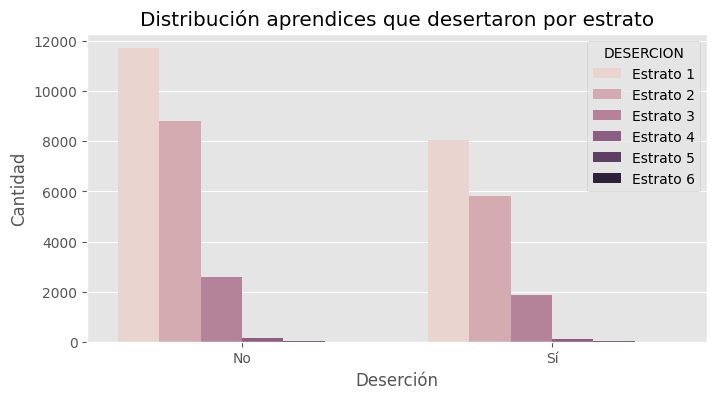

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='DESERCION', hue=df['ESTRATO'])
plt.xlabel('Deserción')
plt.ylabel('Cantidad')
plt.title('Distribución aprendices que desertaron por estrato')
plt.legend(title='DESERCION', labels=['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6'])
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

### __Coeficiente de Cramér:__
Fuente: "La V de Cramer y su aplicación al análisis de datos", https://es.statisticseasily.com/cramers-v/

Se crea funcion para el calculo del coeficiente de cramér el cual determina si existe una asociación o dependencia entre dos variables categoricas:

La formula para el coeficiente de Cramér (V) es:

$V = \sqrt{\frac{X²}{n * min(k - 1, r - 1)}}$

Donde:

* $X²$ es el estadístico chi-cuadrado calculado a partir de la tabla de contingencia.
* $n$ es el tamaño total de la muestra o el número total de observaciones.
* $k$ es el número de columnas (categorías) en la tabla de contingencia.
* $r$ es el número de filas (categorías) en la tabla de contingencia.

Para evitar que el indice chi cuadrado sea negativo se realiza la siguiente correción:

$ϕ_{corr}^2 = max(0, ϕ^2 − \frac{(k−1)⋅(r−1)}{n-1})$

* Si $ϕ^2$ calculado originalmente es positivo, la corrección no tiene efecto y $ϕ_{corr}^2$ se mantiene igual a $ϕ^2$.
* Si $ϕ^2$ calculado originalmente es negativo, la corrección lo ajusta a cero, evitando que el valor sea negativo.

In [ ]:
def cramers_v_corrected(x, y):
    tabla_contingencia = pd.crosstab(x, y)

    chi2, _, _, _ = chi2_contingency(tabla_contingencia)
    n = tabla_contingencia.sum().sum()
    r, k = tabla_contingencia.shape

    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    cramers_coef = np.sqrt(phi2corr / (min(k-1, r-1)))

    return cramers_coef

### __Matriz correlación:__

* Se crea una matriz de correlación con el coeficiente de Cramér para las variables categoricas del dataframe.

In [ ]:
corr_matrix = pd.DataFrame(
    np.zeros(
        (len(df_categorical.columns),
         len(df_categorical.columns))),
         columns=df_categorical.columns,
         index=df_categorical.columns)

for i in range(len(df_categorical.columns)):
    for j in range(i, len(df_categorical.columns)):
        if i != j:
            corr_value = cramers_v_corrected(df_categorical.iloc[:, i], df_categorical.iloc[:, j])
            corr_matrix.iloc[i, j] = corr_value
            corr_matrix.iloc[j, i] = corr_value

<Axes: >

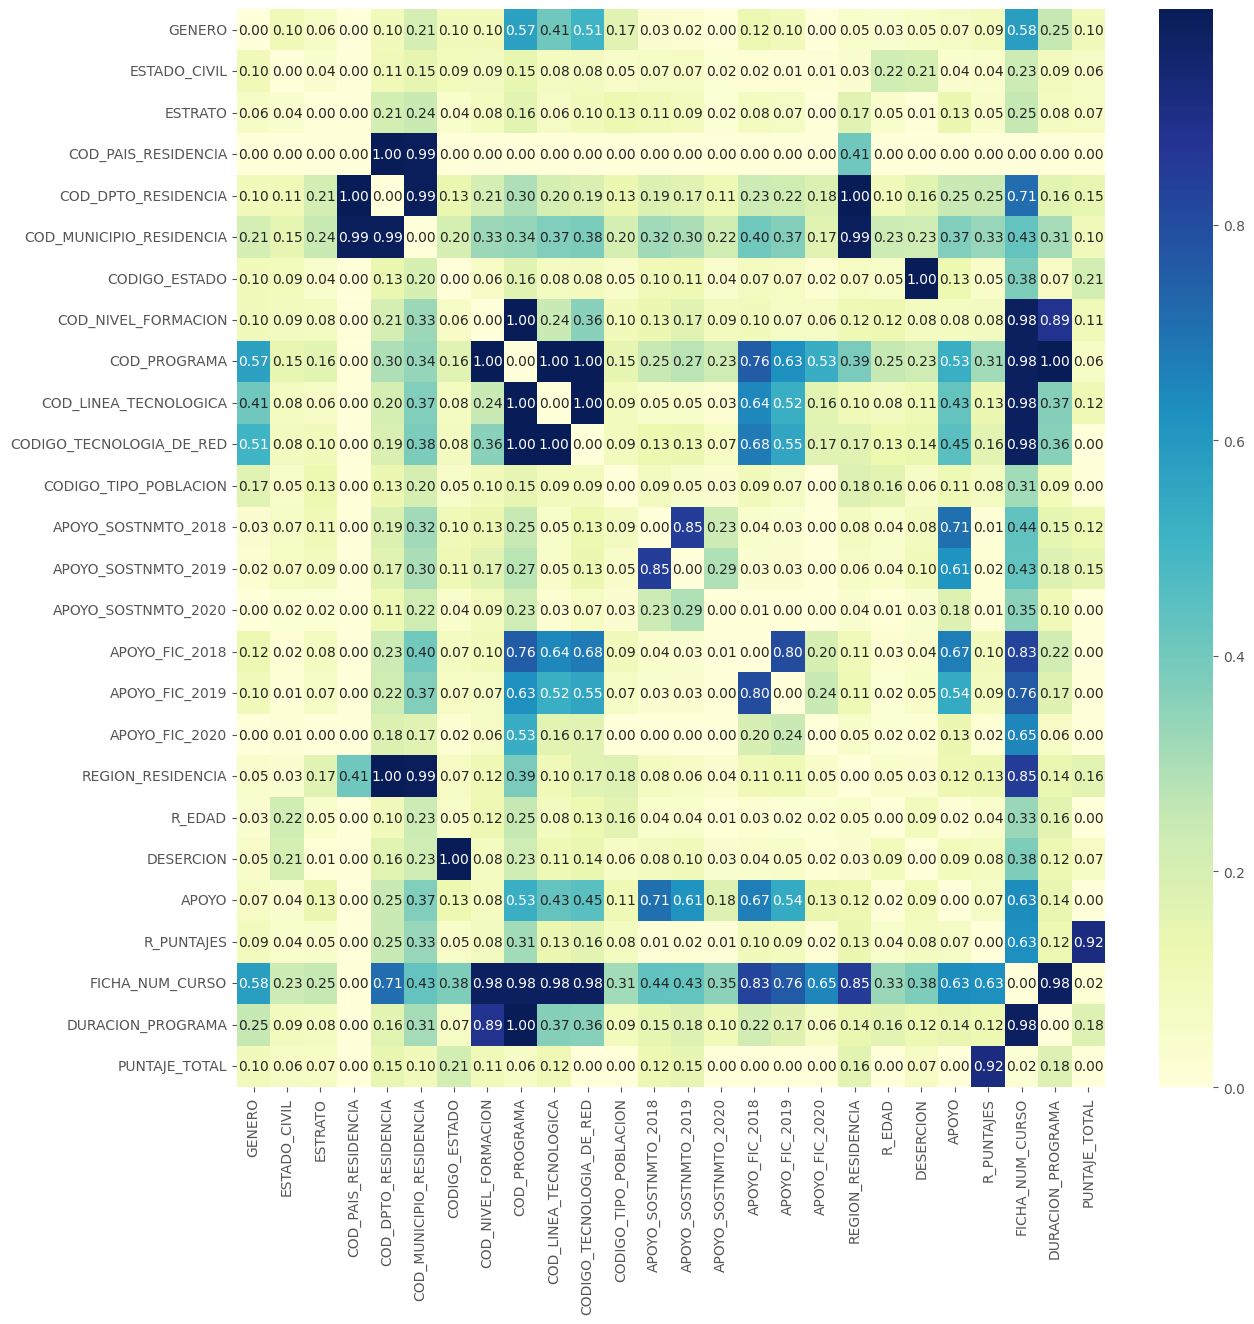

In [ ]:
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu")

In [ ]:
chi2_contingency(pd.crosstab(df['DURACION_PROGRAMA'], df['DESERCION']))[2]

15

<Axes: ylabel='COD_PROGRAMA'>

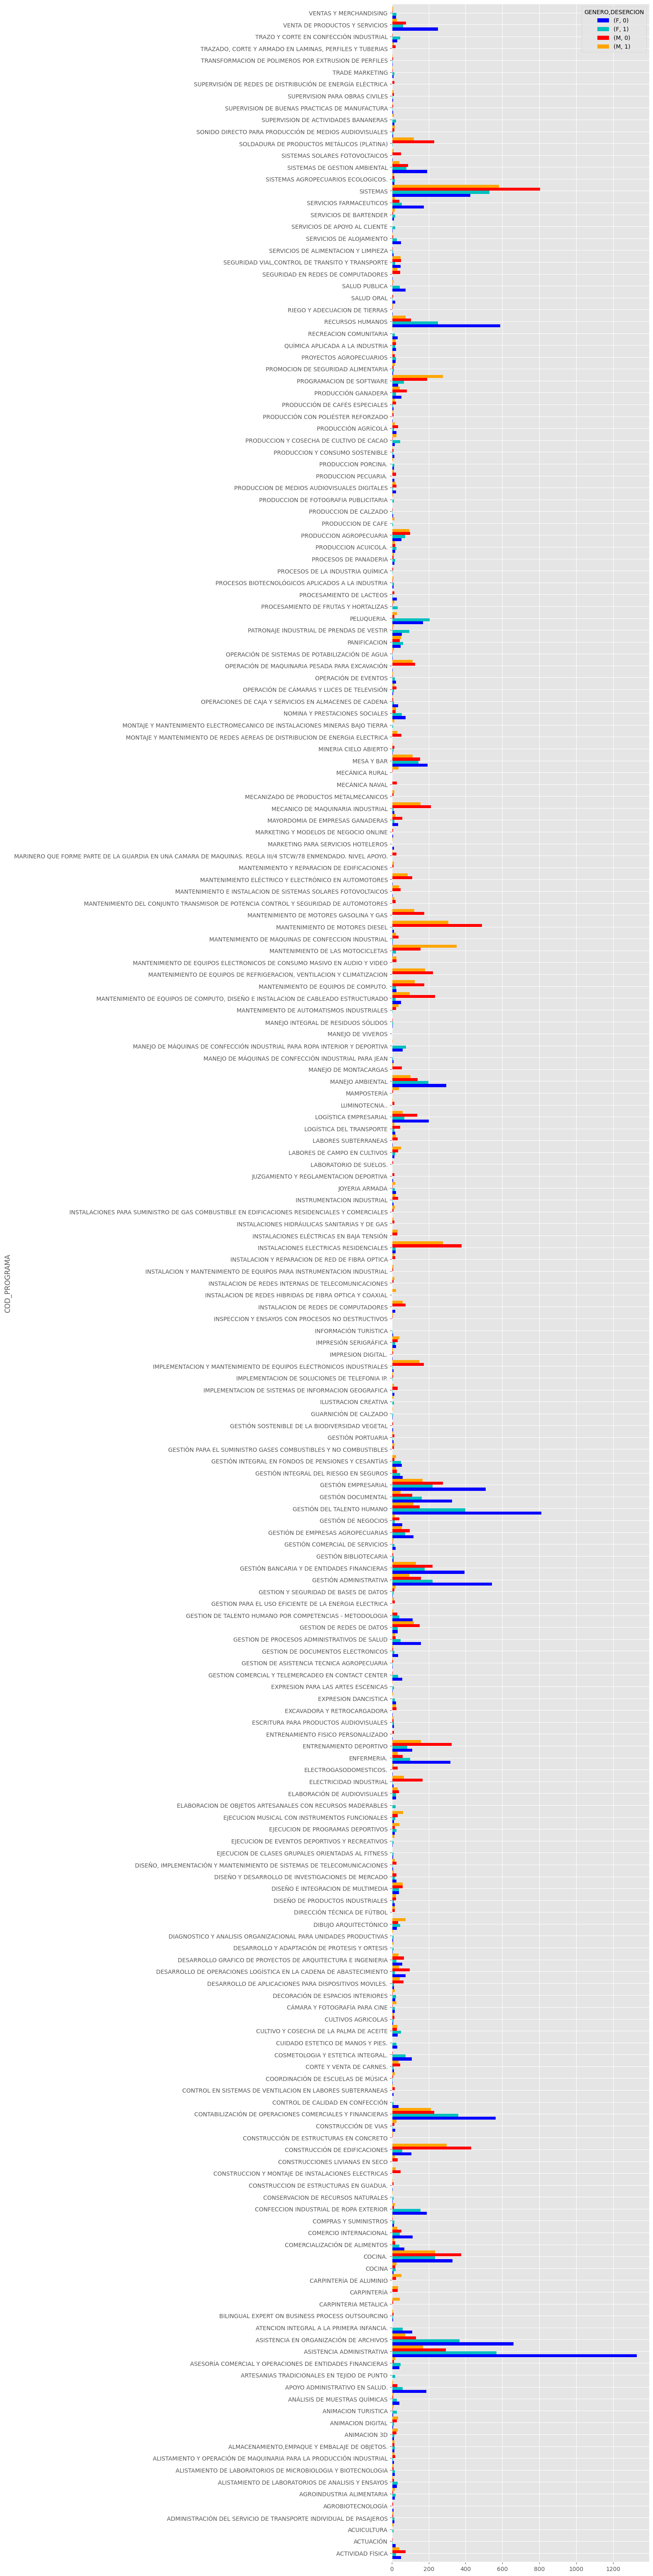

In [ ]:
pd.crosstab(df['COD_PROGRAMA'].map(diccionario_programas), [df['GENERO'], df['DESERCION']]).plot(kind='barh', width=1, figsize=(8, 80), color=['b', 'c', 'r', 'orange'])

In [ ]:
dd = pd.crosstab([df['COD_DPTO_RESIDENCIA'].map(diccionario_ciudades), df['GENERO']], df['DESERCION'], normalize=True)
dd[:20]

DESERCION                          0         1
COD_DPTO_RESIDENCIA GENERO                    
A CORUÑA            M       0.000000  0.000026
AMAZONAS            F       0.000486  0.000205
                    M       0.000205  0.000230
ANCONA              M       0.000026  0.000000
ANTIOQUIA           F       0.032428  0.019181
                    M       0.027953  0.021457
APURE               M       0.000000  0.000026
ARAUCA              F       0.001816  0.003708
                    M       0.000946  0.003683
ASTURIAS            F       0.000000  0.000026
ATLÁNTICO           F       0.011457  0.007723
                    M       0.013350  0.013631
BOGOTÁ D.C.         F       0.075265  0.045906
                    M       0.064421  0.049895
BOLÍVAR             F       0.008618  0.005703
                    M       0.013529  0.008005
BOYACÁ              F       0.010127  0.005396
                    M       0.010818  0.006266
BRUSELAS            M       0.000000  0.000026
BUCAREST            M       0.000026  0.000000

<Axes: xlabel='COD_DPTO_RESIDENCIA,GENERO'>

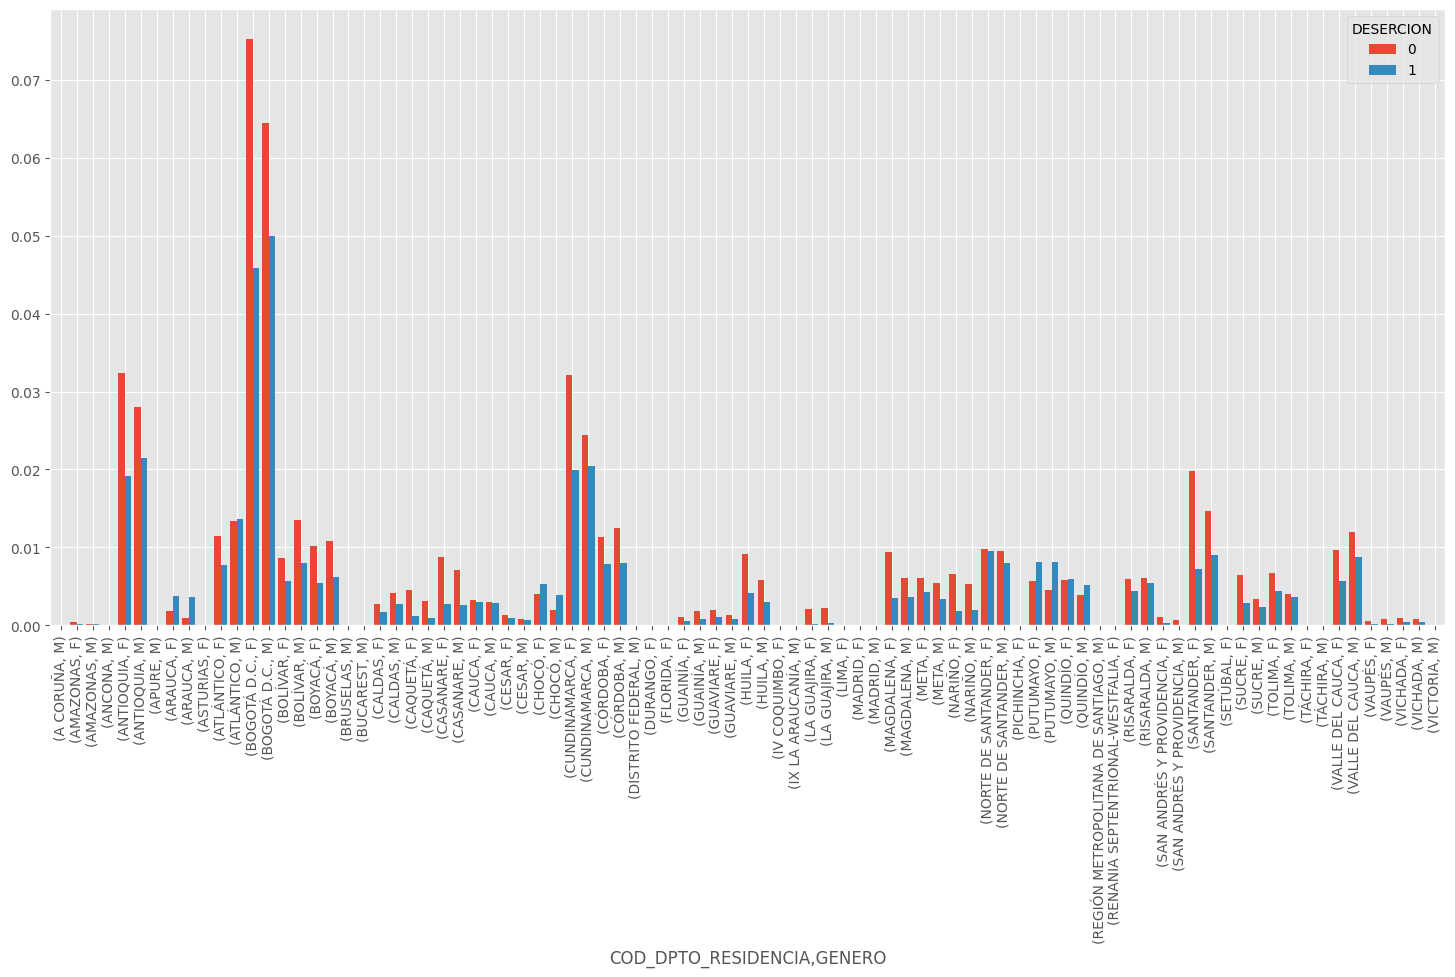

In [ ]:
dd.plot(kind='bar',figsize=(18, 8), width=0.8)

In [ ]:
a = pd.crosstab(index=[df['DURACION_PROGRAMA'], df['GENERO']], columns=df['DESERCION'], margins=True, normalize=True)
a

DESERCION                        0         1       All
DURACION_PROGRAMA GENERO                              
6                 F       0.003325  0.004629  0.007954
                  M       0.001611  0.003273  0.004885
12                F       0.153905  0.095085  0.248990
                  M       0.131605  0.100737  0.232341
18                F       0.000460  0.000102  0.000563
                  M       0.000179  0.000026  0.000205
24                F       0.097975  0.049077  0.147051
                  M       0.064319  0.039819  0.104138
30                F       0.000153  0.000230  0.000384
                  M       0.000077  0.000230  0.000307
432               F       0.000102  0.000026  0.000128
                  M       0.001279  0.000256  0.001534
864               F       0.006700  0.004194  0.010895
                  M       0.006956  0.004859  0.011815
880               F       0.001739  0.001407  0.003146
                  M       0.003811  0.001739  0.005550
1026              F       0.000665  0.000921  0.001586
                  M       0.001074  0.001713  0.002788
1296              F       0.005780  0.005064  0.010843
                  M       0.000818  0.000972  0.001790
1760              F       0.003606  0.003069  0.006675
                  M       0.001304  0.001228  0.002532
2200              F       0.018567  0.018260  0.036827
                  M       0.038591  0.032249  0.070840
2208              F       0.004271  0.006112  0.010383
                  M       0.017288  0.019564  0.036852
2640              F       0.019308  0.006598  0.025907
                  M       0.003427  0.001662  0.005089
3940              F       0.000230  0.000102  0.000332
                  M       0.004245  0.001688  0.005933
3960              F       0.000639  0.000307  0.000946
                  M       0.000332  0.000460  0.000793
All                       0.594343  0.405657  1.000000

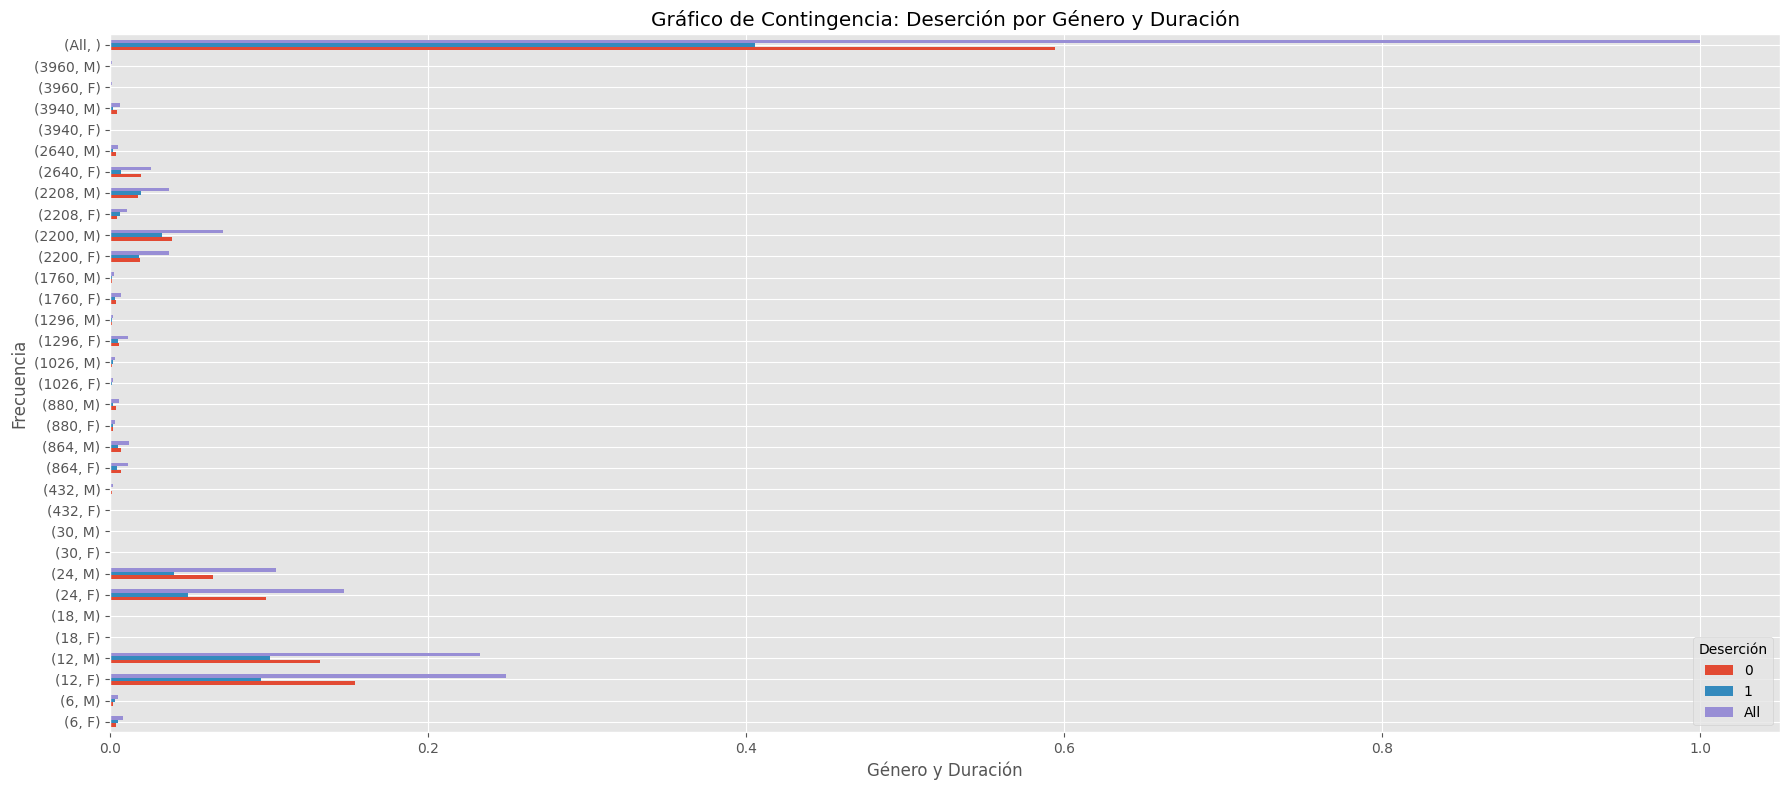

In [ ]:
a.plot(kind='barh', figsize=(18, 8))
plt.title('Gráfico de Contingencia: Deserción por Género y Duración')
plt.xlabel('Género y Duración')
plt.ylabel('Frecuencia')
plt.legend(title='Deserción')

plt.tight_layout()

plt.show()

In [ ]:
df.columns

Index(['GENERO', 'FECHA_NACIMIENTO', 'EDAD_MATRICULA', 'ESTADO_CIVIL',
       'ESTRATO', 'COD_PAIS_RESIDENCIA', 'COD_DPTO_RESIDENCIA',
       'COD_MUNICIPIO_RESIDENCIA', 'CODIGO_ESTADO', 'COD_NIVEL_FORMACION',
       'COD_PROGRAMA', 'COD_LINEA_TECNOLOGICA', 'CODIGO_TECNOLOGIA_DE_RED',
       'FICHA_NUM_CURSO', 'CODIGO_REGIONAL', 'CODIGO_CENTRO', 'EDAD',
       'CODIGO_TIPO_POBLACION', 'APOYO_SOSTNMTO_2018', 'APOYO_SOSTNMTO_2019',
       'APOYO_SOSTNMTO_2020', 'APOYO_SOSTNMTO_2021', 'APOYO_SOSTNMTO_2022',
       'APOYO_SOSTNMTO_2023', 'APOYO_FIC_2018', 'APOYO_FIC_2019',
       'APOYO_FIC_2020', 'APOYO_FIC_2021', 'PUNTAJE_TOTAL', 'FECHA_MATRICULA',
       'FECHA_ULTIMO_ESTADO', 'DURACION_PROGRAMA', 'REGION_RESIDENCIA',
       'R_EDAD', 'DESERCION', 'APOYO', 'R_PUNTAJES', 'DURACION_DIAS'],
      dtype='object')

In [ ]:
df_model = df[['GENERO', 'ESTADO_CIVIL', 'ESTRATO', 'COD_DPTO_RESIDENCIA', 'COD_MUNICIPIO_RESIDENCIA',
                     'COD_NIVEL_FORMACION', 'COD_PROGRAMA', 'COD_LINEA_TECNOLOGICA', 'CODIGO_TECNOLOGIA_DE_RED', 'FICHA_NUM_CURSO', 'CODIGO_REGIONAL', 'CODIGO_CENTRO',
                     'EDAD' ,'CODIGO_TIPO_POBLACION', 'APOYO_SOSTNMTO_2018', 'APOYO_SOSTNMTO_2019', 'APOYO_SOSTNMTO_2020', 'APOYO_FIC_2018',
                     'APOYO_FIC_2019', 'APOYO_FIC_2020', 'PUNTAJE_TOTAL', 'DURACION_PROGRAMA', 'REGION_RESIDENCIA', 'R_EDAD', 'APOYO', 'R_PUNTAJES', 'DESERCION']]
df_model.head(5)

GENERO ESTADO_CIVIL  ESTRATO  COD_DPTO_RESIDENCIA  COD_MUNICIPIO_RESIDENCIA  \
0      M      SOLTERO        2                57066                  57066001   
1      M      SOLTERO        2                57066                  57066001   
2      F      SOLTERO        2                57066                  57066001   
3      F      SOLTERO        2                57066                  57066170   
4      M   NO REPORTA        2                57066                  57066170   

   COD_NIVEL_FORMACION  COD_PROGRAMA  COD_LINEA_TECNOLOGICA  \
0                    2        122703                      5   
1                    2        122703                      5   
2                    2        122703                      5   
3                    2        122703                      5   
4                    2        122703                      5   

   CODIGO_TECNOLOGIA_DE_RED  FICHA_NUM_CURSO  ...  APOYO_FIC_2018  \
0                        22          1580728  ...               0   
1                        22          1580728  ...               0   
2                        22          1580728  ...               0   
3                        22          1580728  ...               0   
4                        22          1580728  ...               0   

   APOYO_FIC_2019  APOYO_FIC_2020  PUNTAJE_TOTAL  DURACION_PROGRAMA  \
0               0               0          89.13                 12   
1               0               0          87.27                 12   
2               0               0          88.06                 12   
3               0               0          88.00                 12   
4               0               0          87.85                 12   

   REGION_RESIDENCIA        R_EDAD  APOYO  R_PUNTAJES  DESERCION  
0       EJE_CAFETERO  ADOLESCENCIA      0      80-100          0  
1       EJE_CAFETERO  ADOLESCENCIA      0      80-100          0  
2       EJE_CAFETERO  ADOLESCENCIA      0      80-100          0  
3       EJE_CAFETERO  ADOLESCENCIA      0      80-100          0  
4       EJE_CAFETERO      JUVENTUD      0      80-100          0  

[5 rows x 27 columns]

In [ ]:
corr_matrix = pd.DataFrame(
    np.zeros(
        (len(df_model.columns),
         len(df_model.columns))),
         columns=df_model.columns,
         index=df_model.columns)

for i in range(len(df_model.columns)):
    for j in range(i, len(df_model.columns)):
        if i != j:
            corr_value = cramers_v_corrected(df_model.iloc[:, i], df_model.iloc[:, j])
            corr_matrix.iloc[i, j] = corr_value
            corr_matrix.iloc[j, i] = corr_value

<Axes: >

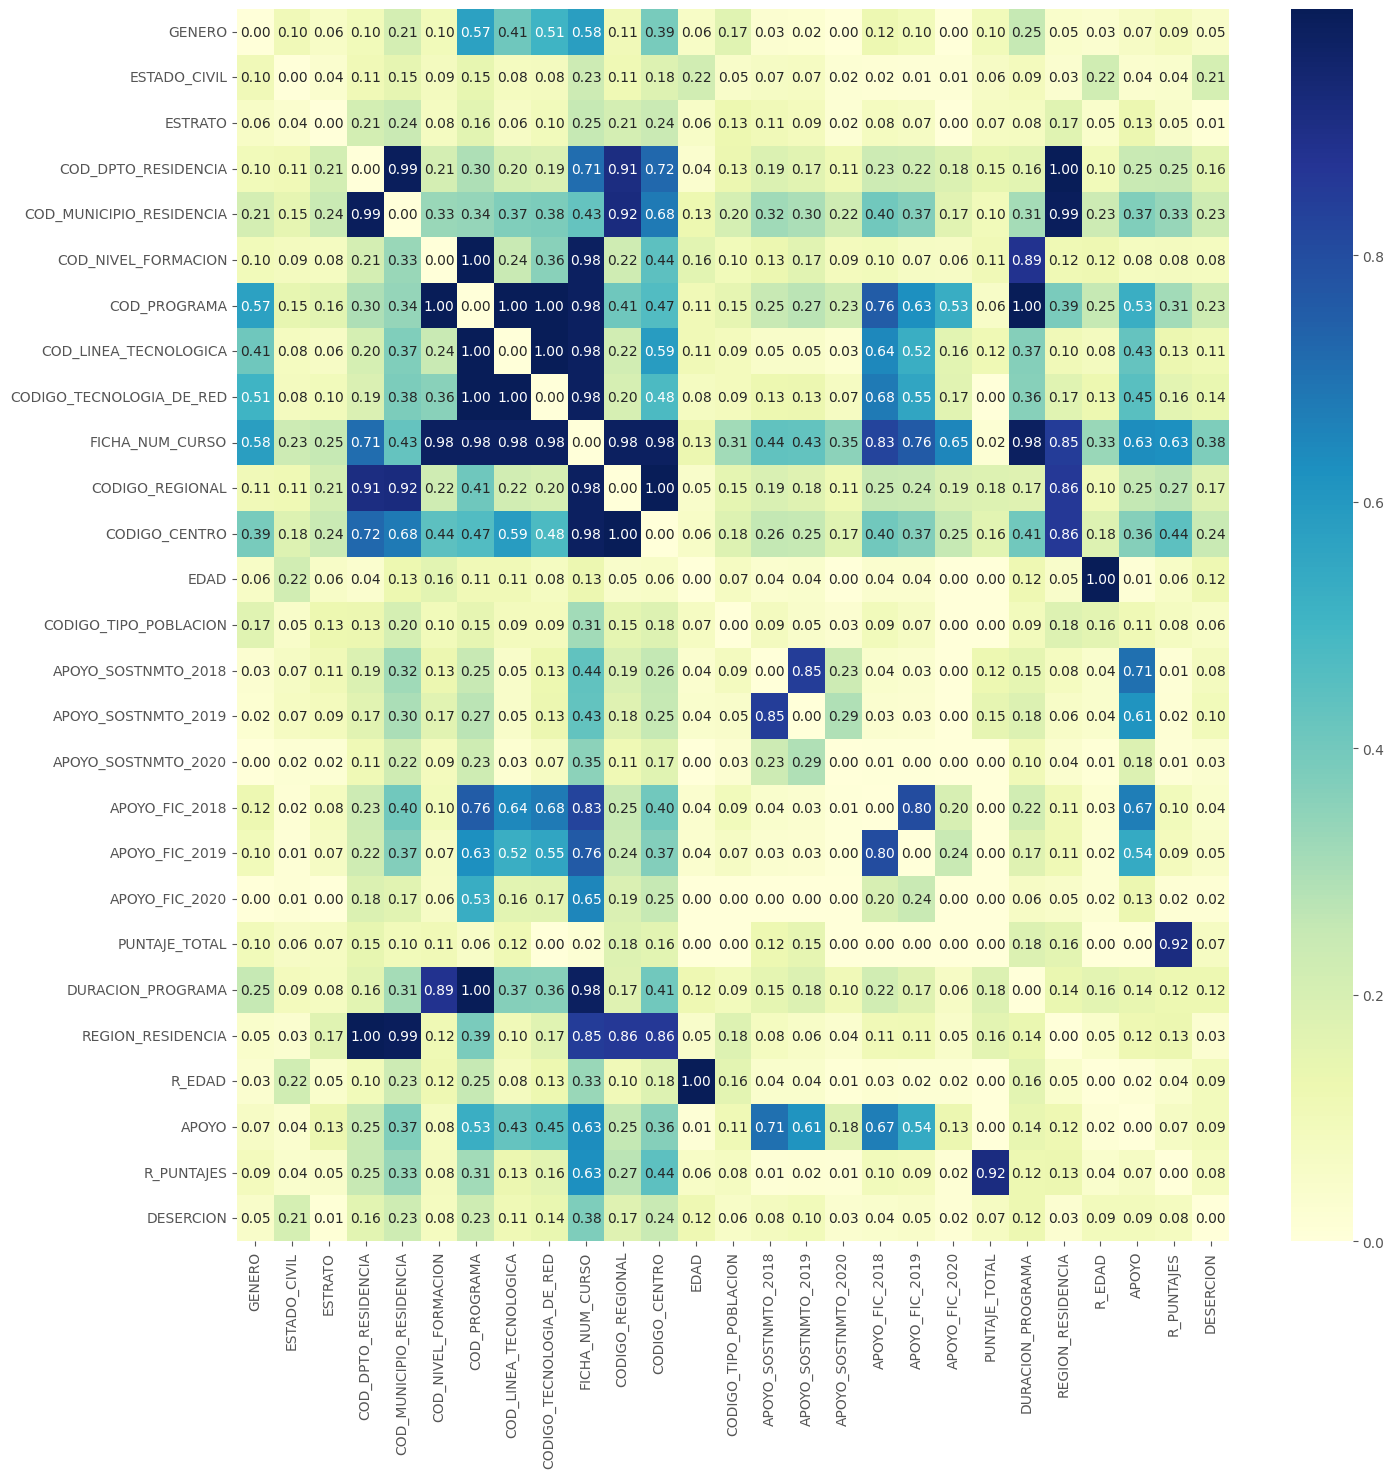

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu")

In [ ]:
label_encoders = {}
columns_to_encode = ['GENERO', 'ESTADO_CIVIL', 'REGION_RESIDENCIA', 'R_EDAD', 'R_PUNTAJES']

for column in columns_to_encode:
    label_encoder = preprocessing.LabelEncoder()
    encoded_column = label_encoder.fit_transform(df_model[column])
    label_encoders[column] = {index: label for index, label in enumerate(label_encoder.classes_)}
    position = df_model.columns.get_loc(column)
    df_model = df_model.drop(column, axis=1)
    df_model.insert(position, column, encoded_column)


In [ ]:
df_model.shape

(39102, 27)

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39102 entries, 0 to 39101
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GENERO                    39102 non-null  int64  
 1   ESTADO_CIVIL              39102 non-null  int64  
 2   ESTRATO                   39102 non-null  int64  
 3   COD_DPTO_RESIDENCIA       39102 non-null  int64  
 4   COD_MUNICIPIO_RESIDENCIA  39102 non-null  int64  
 5   COD_NIVEL_FORMACION       39102 non-null  int64  
 6   COD_PROGRAMA              39102 non-null  int64  
 7   COD_LINEA_TECNOLOGICA     39102 non-null  int64  
 8   CODIGO_TECNOLOGIA_DE_RED  39102 non-null  int64  
 9   FICHA_NUM_CURSO           39102 non-null  int64  
 10  CODIGO_REGIONAL           39102 non-null  int64  
 11  CODIGO_CENTRO             39102 non-null  int64  
 12  EDAD                      39102 non-null  int64  
 13  CODIGO_TIPO_POBLACION     39102 non-null  int64  
 14  APOYO_

In [ ]:
X = df_model.drop('DESERCION', axis=1)
y = df_model['DESERCION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelo Random Forest

In [ ]:
forest = RandomForestClassifier(min_samples_split=2, n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

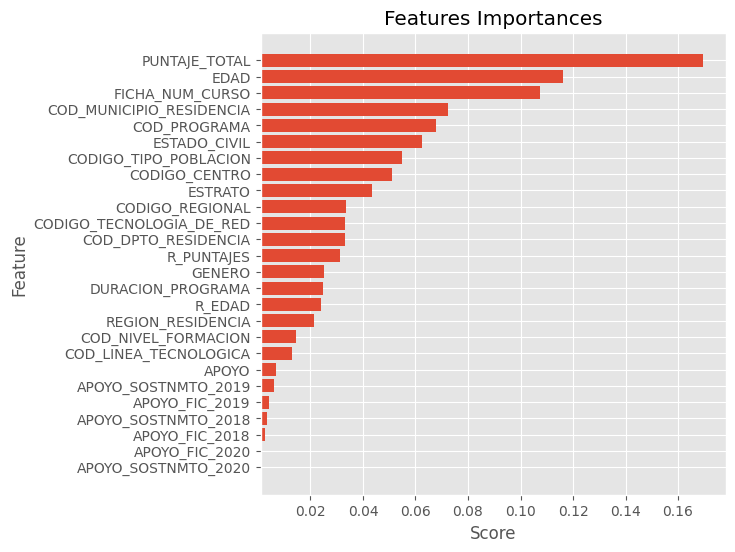

                     feature     score
0              PUNTAJE_TOTAL  0.168644
1                       EDAD  0.115309
2            FICHA_NUM_CURSO  0.106441
3   COD_MUNICIPIO_RESIDENCIA  0.071537
4               COD_PROGRAMA  0.066944
5               ESTADO_CIVIL  0.061469
6      CODIGO_TIPO_POBLACION  0.053783
7              CODIGO_CENTRO  0.050123
8                    ESTRATO  0.042436
9            CODIGO_REGIONAL  0.032644
10  CODIGO_TECNOLOGIA_DE_RED  0.032357
11       COD_DPTO_RESIDENCIA  0.032143
12                R_PUNTAJES  0.030171
13                    GENERO  0.024283
14         DURACION_PROGRAMA  0.023619
15                    R_EDAD  0.023023
16         REGION_RESIDENCIA  0.020332
17       COD_NIVEL_FORMACION  0.013502
18     COD_LINEA_TECNOLOGICA  0.012158
19                     APOYO  0.005964
20       APOYO_SOSTNMTO_2019  0.005156
21            APOYO_FIC_2019  0.003164
22       APOYO_SOSTNMTO_2018  0.002635
23            APOYO_FIC_2018  0.001692
24            APOYO_FIC_2

In [ ]:
result = {}
for i, feature in enumerate(X.columns):
    result[feature] = forest.feature_importances_[i]
f_importances = sorted(result.items(), key=lambda x: x[1], reverse=True)

feat_names =[a_tuple[0] for a_tuple in f_importances]
score = [a_tuple[1] for a_tuple in f_importances]

fig, ax = plt.subplots(figsize=(6, 6))
ax.barh(np.arange(len(f_importances)), score, left=0.001)
ax.set_yticks(np.arange(len(f_importances)))
ax.set_yticklabels(feat_names)
ax.invert_yaxis()  # feat read top-to-bottom
ax.set_xlabel('Score')
ax.set_ylabel('Feature')
ax.set_title('Features Importances')
plt.show()
df_feat_importances = pd.DataFrame()
df_feat_importances['feature'] = feat_names
df_feat_importances['score'] = score
print(df_feat_importances)

In [ ]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

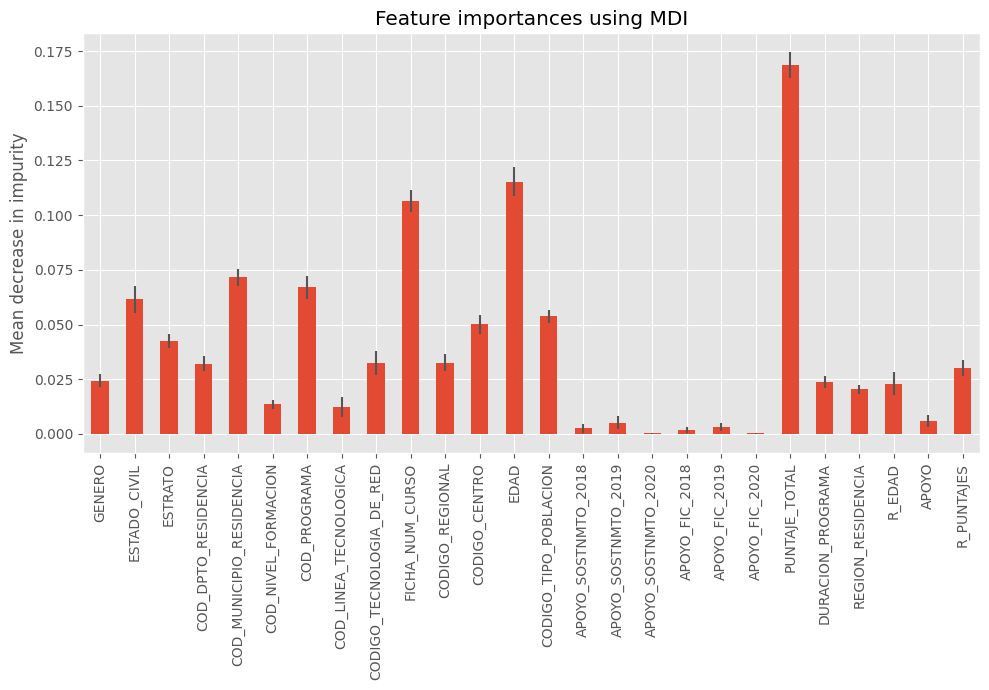

In [ ]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots(figsize=(10,7))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
# Realizar predicciones en los datos de prueba
y_pred = forest.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print(f'Clasificaciones generales:\n {classification_rep}')

Exactitud del modelo: 0.6602165203307476
Clasificaciones generales:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      7021
           1       0.59      0.50      0.54      4710

    accuracy                           0.66     11731
   macro avg       0.64      0.63      0.64     11731
weighted avg       0.65      0.66      0.65     11731



In [ ]:
X = X.drop(columns=['FICHA_NUM_CURSO','APOYO_SOSTNMTO_2018', 'APOYO_SOSTNMTO_2019', 'APOYO_SOSTNMTO_2020', 'APOYO_FIC_2018',
                     'APOYO_FIC_2019', 'APOYO_FIC_2020', 'APOYO'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

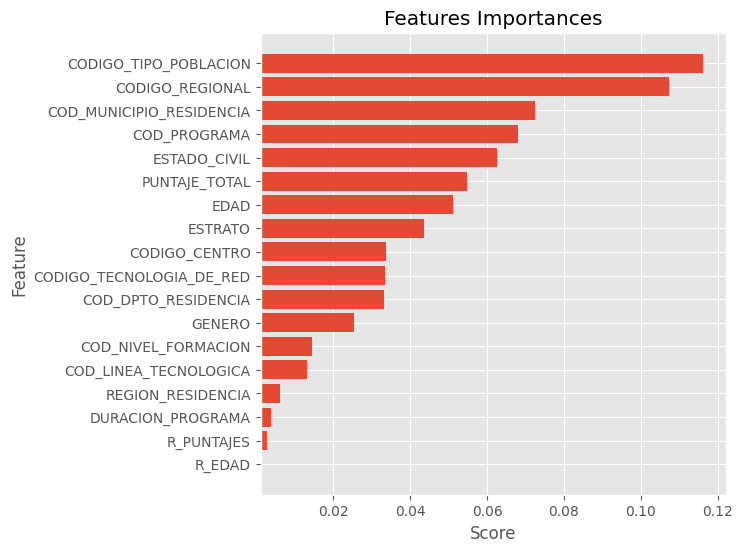

                     feature     score
0      CODIGO_TIPO_POBLACION  0.115309
1            CODIGO_REGIONAL  0.106441
2   COD_MUNICIPIO_RESIDENCIA  0.071537
3               COD_PROGRAMA  0.066944
4               ESTADO_CIVIL  0.061469
5              PUNTAJE_TOTAL  0.053783
6                       EDAD  0.050123
7                    ESTRATO  0.042436
8              CODIGO_CENTRO  0.032644
9   CODIGO_TECNOLOGIA_DE_RED  0.032357
10       COD_DPTO_RESIDENCIA  0.032143
11                    GENERO  0.024283
12       COD_NIVEL_FORMACION  0.013502
13     COD_LINEA_TECNOLOGICA  0.012158
14         REGION_RESIDENCIA  0.005156
15         DURACION_PROGRAMA  0.002635
16                R_PUNTAJES  0.001692
17                    R_EDAD  0.000209


In [ ]:
result = {}
for i, feature in enumerate(X.columns):
    result[feature] = forest.feature_importances_[i]
f_importances = sorted(result.items(), key=lambda x: x[1], reverse=True)

feat_names =[a_tuple[0] for a_tuple in f_importances]
score = [a_tuple[1] for a_tuple in f_importances]

fig, ax = plt.subplots(figsize=(6, 6))
ax.barh(np.arange(len(f_importances)), score, left=0.001)
ax.set_yticks(np.arange(len(f_importances)))
ax.set_yticklabels(feat_names)
ax.invert_yaxis()  # feat read top-to-bottom
ax.set_xlabel('Score')
ax.set_ylabel('Feature')
ax.set_title('Features Importances')
plt.show()
df_feat_importances = pd.DataFrame()
df_feat_importances['feature'] = feat_names
df_feat_importances['score'] = score
print(df_feat_importances)

In [ ]:
#forest = RandomForestClassifier(min_samples_leaf=30, n_estimators=200, random_state=42)
forest = RandomForestClassifier(criterion='entropy', max_features='log2', min_samples_leaf=20, min_samples_split=25, n_estimators=255, bootstrap=True, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=20, min_samples_split=25,
                       n_estimators=255, n_jobs=-1)

In [ ]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

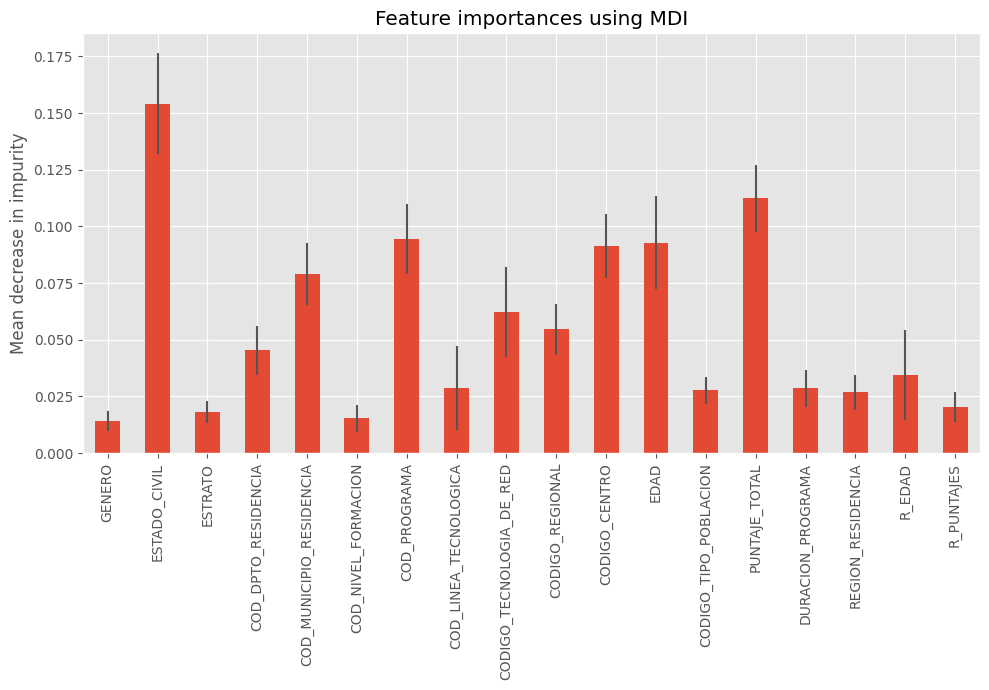

In [ ]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots(figsize=(10,7))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Exactitud del modelo de entrenamiento: {accuracy_train}")
print(f"Exactitud del modelo de prueba: {accuracy_test}")
classification_rep = classification_report(y_test, y_pred_test)
print(f'Clasificaciones generales test: \n{classification_rep}')

Exactitud del modelo de entrenamiento: 0.7285813452193928
Exactitud del modelo de prueba: 0.6686556985764215
Clasificaciones generales test: 
              precision    recall  f1-score   support

           0       0.68      0.84      0.75      7021
           1       0.63      0.41      0.50      4710

    accuracy                           0.67     11731
   macro avg       0.66      0.63      0.63     11731
weighted avg       0.66      0.67      0.65     11731



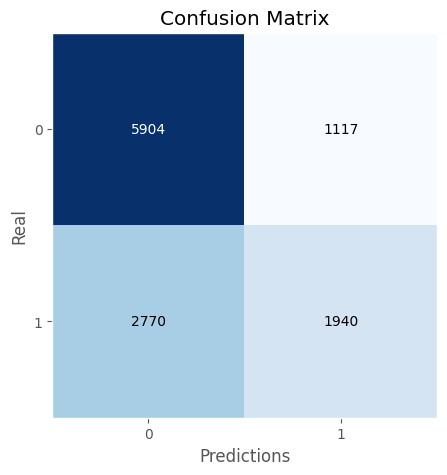

In [ ]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, y_pred_test)
from mlxtend.plotting import plot_confusion_matrix

conf_mat=confusion_matrix(y_test, y_pred_test)
fig, ax = plot_confusion_matrix(conf_mat,figsize=(5,5))
plt.xlabel('Predictions')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
permutation_train = permutation_importance(forest, X_train, y_train,
                               n_repeats=10,
                               random_state=42,
                               n_jobs=2)
sorted_train_idx = permutation_train.importances_mean.argsort()

In [ ]:
permutation_test = permutation_importance(forest, X_test, y_test,
                               n_repeats=10,
                               random_state=42,
                               n_jobs=2)
sorted_test_idx = permutation_test.importances_mean.argsort()

In [ ]:
train_importances = pd.DataFrame(
    permutation_train.importances[sorted_train_idx].T,
    columns=X.columns[sorted_train_idx],
)
test_importances = pd.DataFrame(
    permutation_test.importances[sorted_test_idx].T,
    columns=X.columns[sorted_test_idx],
)

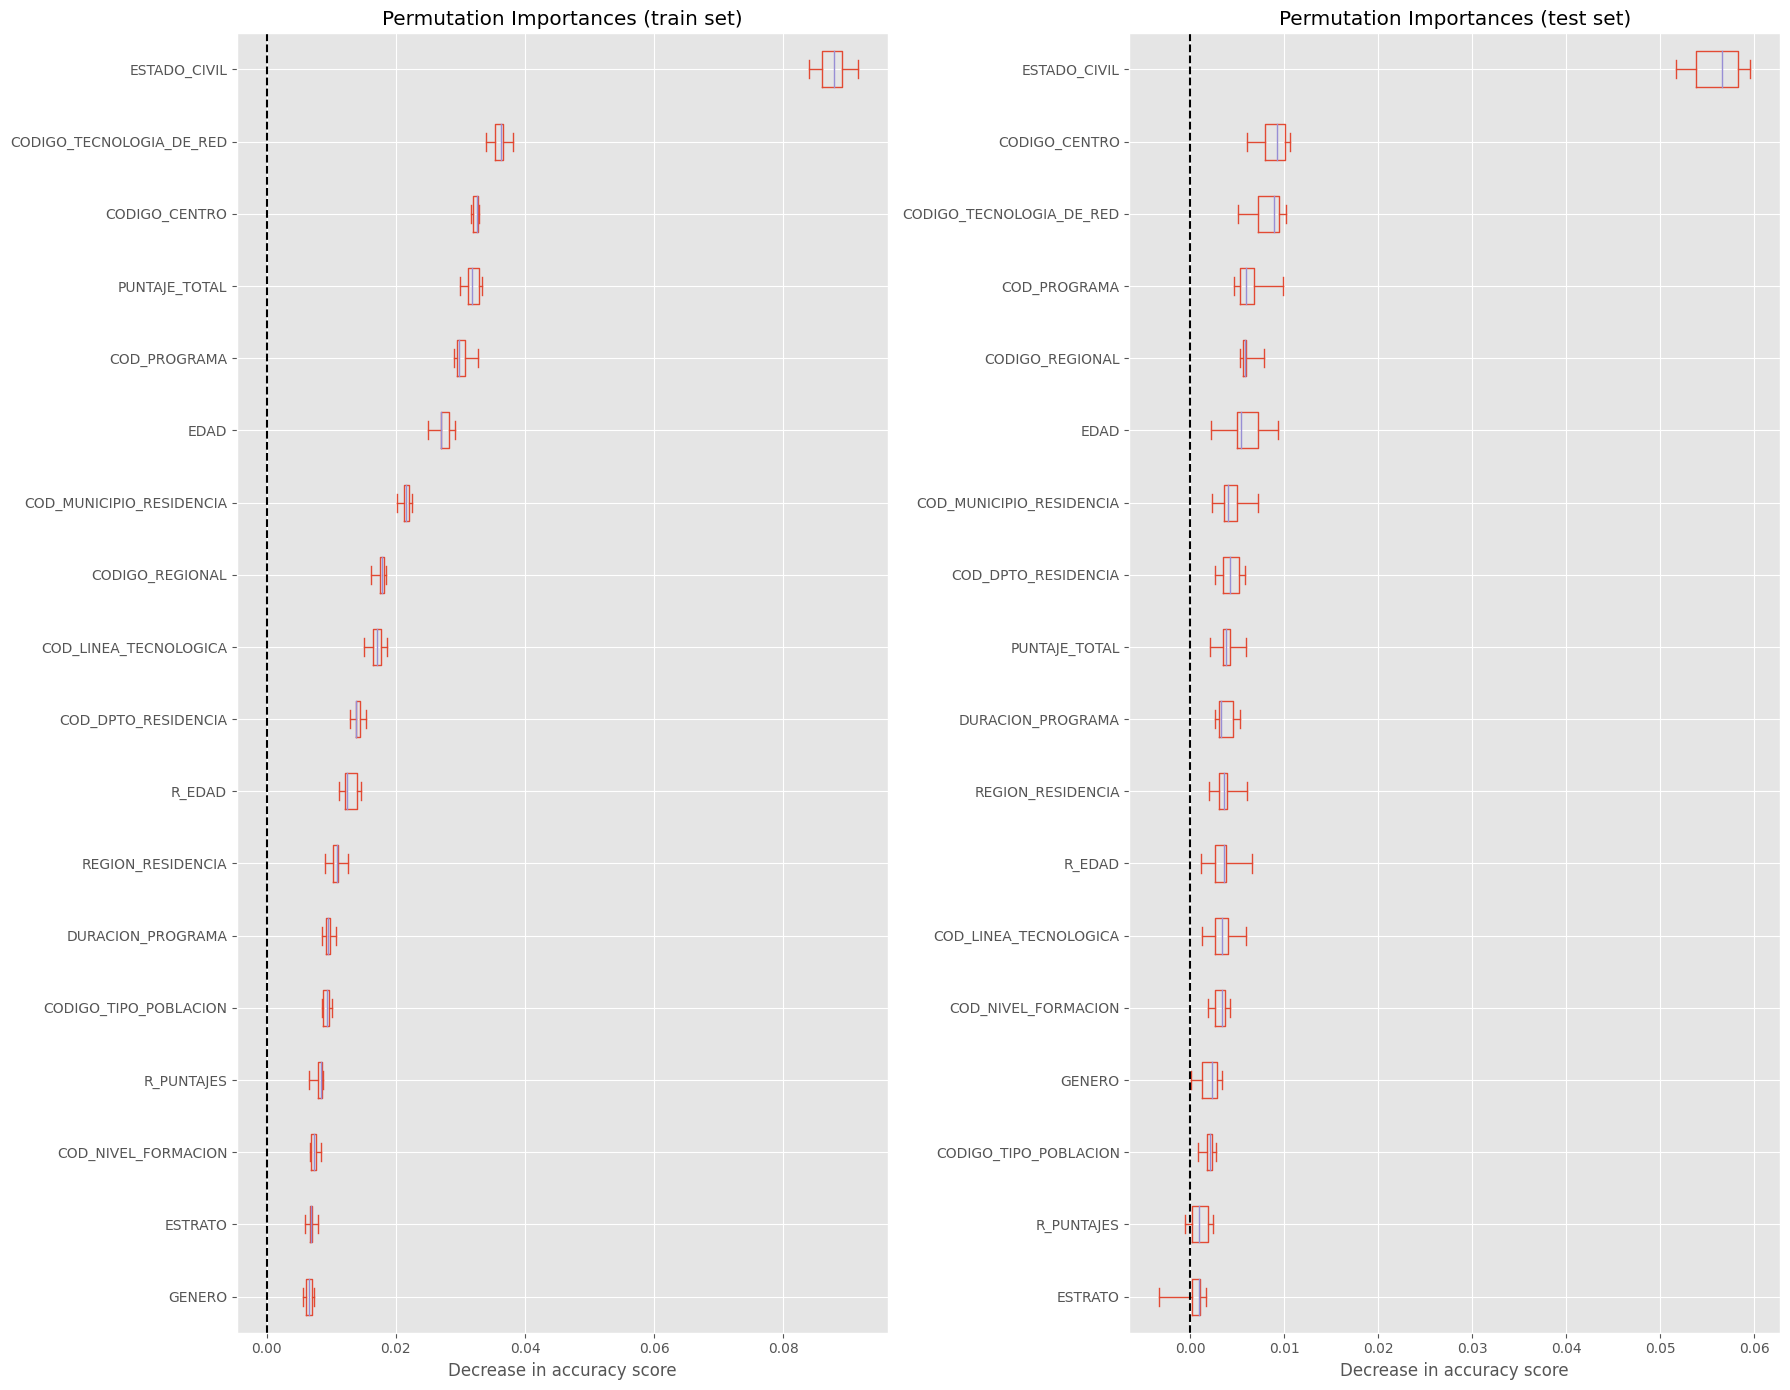

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 14))

for i, (name, importances) in enumerate(zip(["train", "test"], [train_importances, test_importances])):
    ax = axes[i]
    importances.plot.box(vert=False, whis=10, ax=ax)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")

plt.tight_layout()
plt.show()

In [ ]:
def evaluate_classifiers(classifiers, X,Y, cv, n_jobs):
    results = []

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    for name, classifier in classifiers.items():
        # Fit the model
        classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = classifier.predict(X_test)

        y_score = classifier.predict_proba(X_test)[:,1]

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_score)

        # Compute the AUC (Area Under the Curve) score
        roc_auc = auc(fpr, tpr)

        scorer = make_scorer(accuracy_score)
        train_sizes = np.linspace(.001, 0.05, 30)

        train_sizes, train_scores, test_scores = learning_curve(classifier, X, Y, cv=cv, n_jobs=n_jobs,
                                                        train_sizes=train_sizes, scoring=scorer)

        classification_rep = classification_report(y_test, y_pred)

        results.append((name, fpr, tpr, roc_auc, confusion_matrix(y_test, y_pred), train_sizes, train_scores, test_scores,classification_rep))

    return results

def plot_evaluation(results):
    fig, axs = plt.subplots(len(results), 3, figsize=(25, 25))
    axs = axs.flatten()
    j = 0
    for name, fpr, tpr, roc_auc, cm, train_sizes, train_scores, test_scores,classification_rep in results:

        # Calculate the mean and standard deviation of training and test scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Plot ROC curve
        axs[j].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        axs[j].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axs[j].set_xlabel('False Positive Rate')
        axs[j].set_ylabel('True Positive Rate')
        axs[j].set_title(name)
        axs[j].legend(loc='lower right')
        j += 1

        # Create a heatmap for the confusion matrix
        sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=.5, square=True, cbar=False, ax=axs[j])
        axs[j].set_xlabel('Predicted')
        axs[j].set_ylabel('Actual')
        axs[j].set_title(name + ' Confusion Matrix')
        j += 1

        axs[j].set_title(name + " Learning Curve")
        axs[j].set_xlabel("Training Examples")
        axs[j].set_ylabel("Score (Accuracy)")
        axs[j].set_ylim(0, 1)
        axs[j].grid(True)
        axs[j].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
        axs[j].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
        axs[j].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
        axs[j].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
        axs[j].legend(loc="lower left")
        j += 1

    plt.tight_layout()
    plt.show()

def plot_combined_roc(results):
    plt.figure(figsize=(14, 8))

    for name, fpr, tpr, roc_auc, _, _, _, _, _  in results:
        plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Combined ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(algorithm='auto', n_neighbors=8, p=1, weights='uniform', n_jobs=-1),
    "Random Forest": RandomForestClassifier(criterion='entropy', max_features='log2', min_samples_leaf=20, min_samples_split=25, n_estimators=255, bootstrap=True, n_jobs=-1),
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2, min_samples_split=4),
    "Naive_bayes": GaussianNB(priors=None, var_smoothing=1e-4),
    "LogisticRegression": LogisticRegression(C=0.1,class_weight='balanced', n_jobs=-1),  #n_jobs=-1 que utilice todos los procesadores
}

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
n_jobs = -1
results = evaluate_classifiers(classifiers, X,y, cv, n_jobs)


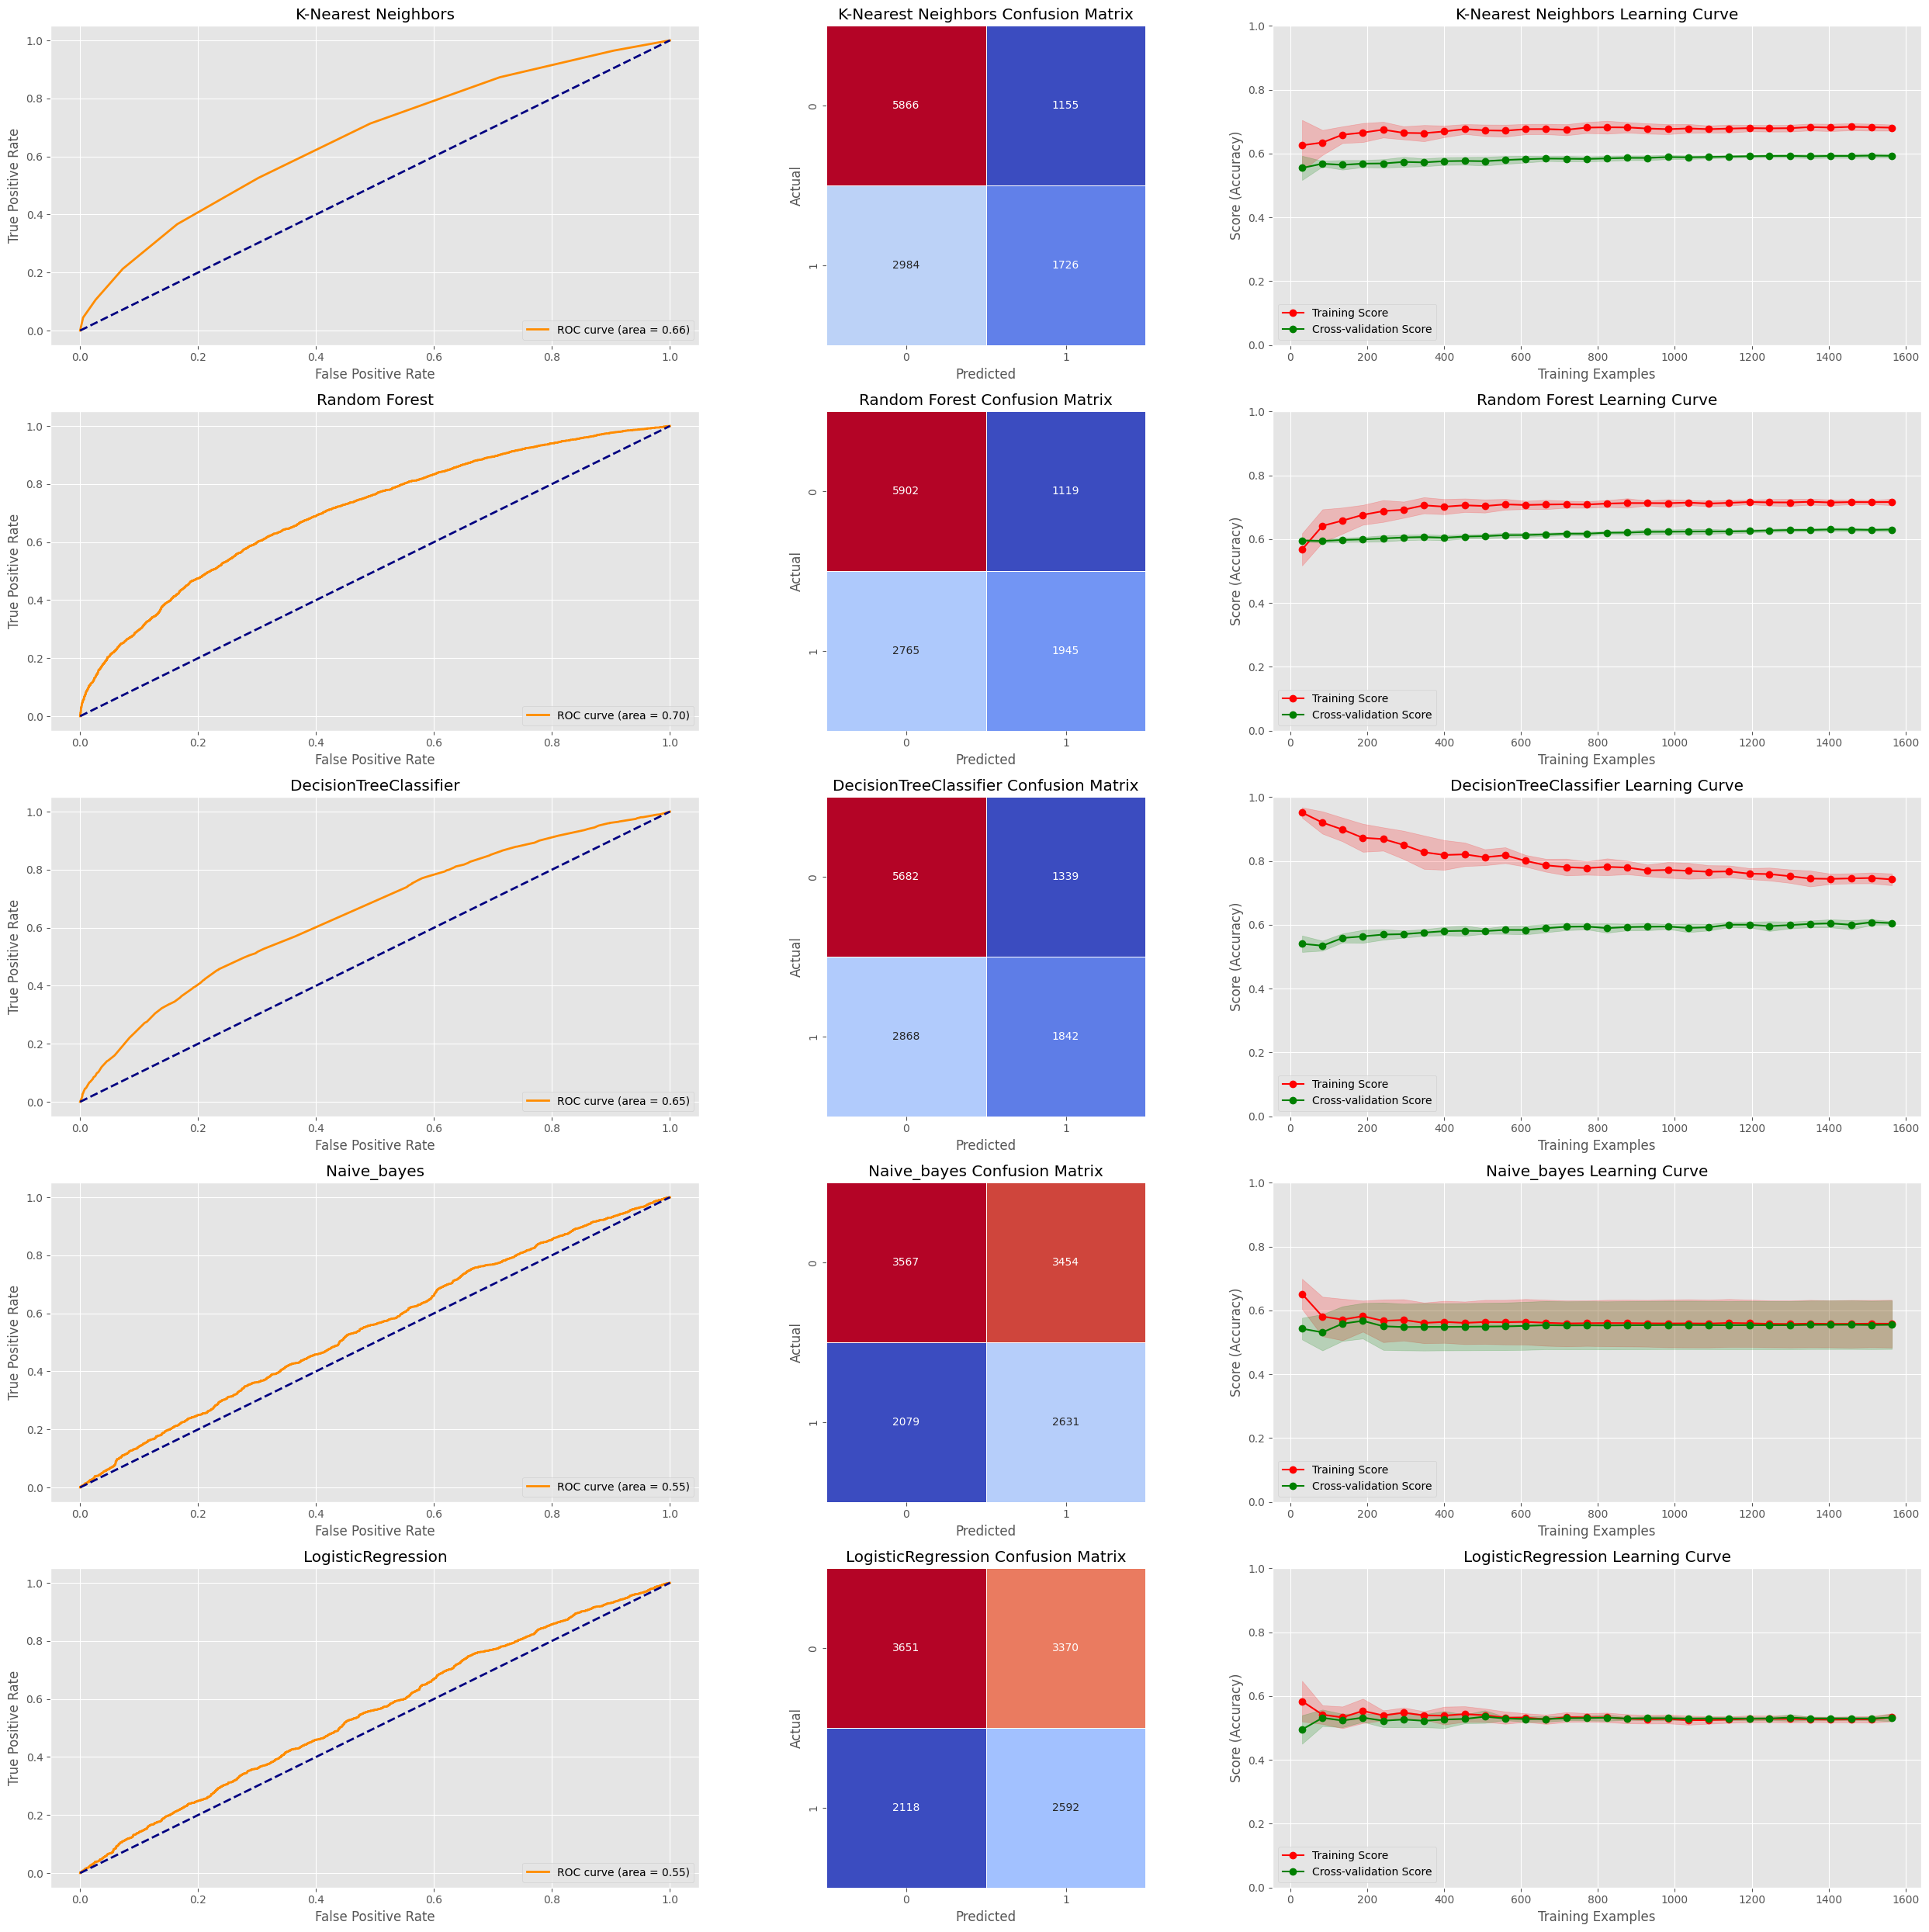

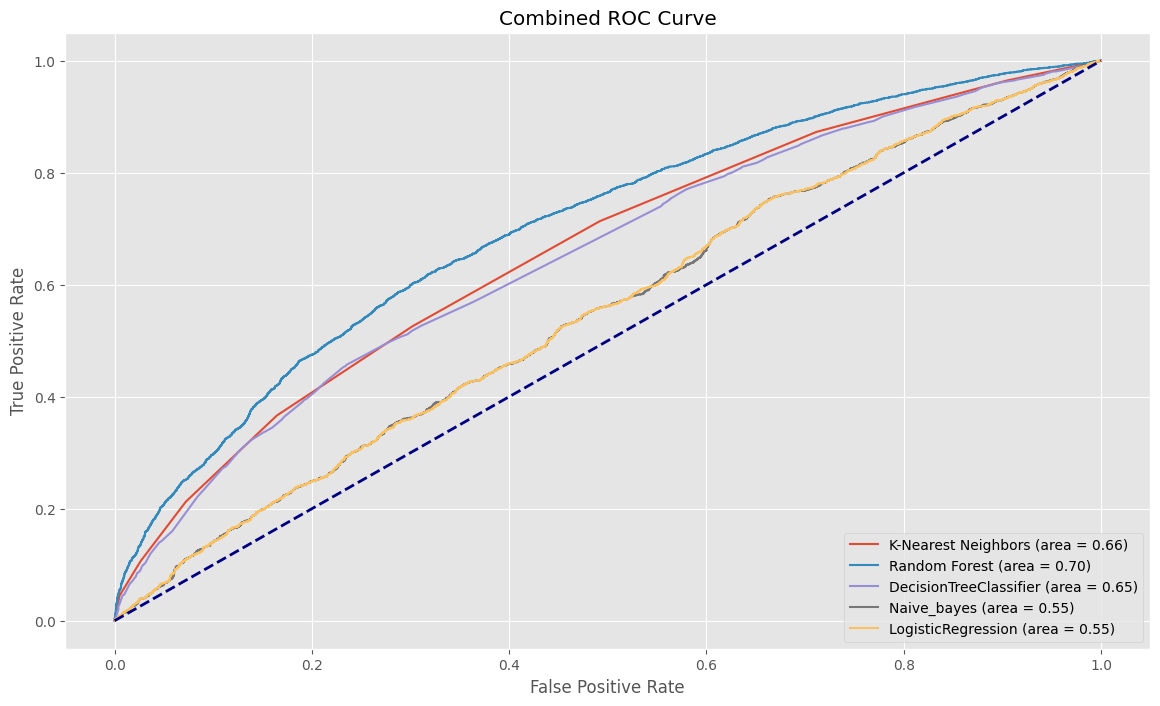

In [ ]:
plot_evaluation(results)
plot_combined_roc(results)

In [ ]:
results[0][8]

'              precision    recall  f1-score   support\n\n           0       0.66      0.84      0.74      7021\n           1       0.60      0.37      0.45      4710\n\n    accuracy                           0.65     11731\n   macro avg       0.63      0.60      0.60     11731\nweighted avg       0.64      0.65      0.62     11731\n'

In [ ]:
#conf_mat=confusion_matrix(y_test, y_pred)
for i in range(5):
  conf_mat= results[i][4]
  TP = conf_mat[1, 1]
  FP = conf_mat[0, 1]
  FN = conf_mat[1, 0]
  TN = conf_mat[0, 0]

  precision1 = TP / (TP + FP)
  precision0 = TN / (TN + FN)
  recall = TP / (TP + FN)
  specificity = TN / (TN + FP)
  accuracy= (TP+TN)/(TP+TN+FP+FN)

  print(f'Modelo1: {results[i][0]}')
  print(f'Accuracy: {accuracy:.4f}')
  #print(f'Precision del 1: {precision1:.4f}')
  #print(f'Precision del 0: {precision0:.4f}')
  #print(f'Macro avg: {(precision0 + precision1)/2:.4f}')
  print(f'Sensibilidad: {recall:.4f}')
  print(f'Especificidad: {specificity:.4f}')
  print(f'Classification report:\n {results[i][8]}')
  print("\n")

Modelo1: K-Nearest Neighbors
Accuracy: 0.6472
Sensibilidad: 0.3665
Especificidad: 0.8355
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.84      0.74      7021
           1       0.60      0.37      0.45      4710

    accuracy                           0.65     11731
   macro avg       0.63      0.60      0.60     11731
weighted avg       0.64      0.65      0.62     11731



Modelo1: Random Forest
Accuracy: 0.6689
Sensibilidad: 0.4130
Especificidad: 0.8406
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.84      0.75      7021
           1       0.63      0.41      0.50      4710

    accuracy                           0.67     11731
   macro avg       0.66      0.63      0.63     11731
weighted avg       0.66      0.67      0.65     11731



Modelo1: DecisionTreeClassifier
Accuracy: 0.6414
Sensibilidad: 0.3911
Especificidad: 0.8093
Classification report:
       

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(min_samples_split=25, n_estimators=255, n_jobs=-1)

In [ ]:
tc = DecisionTreeClassifier()

In [ ]:
gnb = GaussianNB()

In [ ]:
rl = LogisticRegression()

In [ ]:
knn = KNeighborsClassifier()

Grilla con DecisionTreeClassifier

In [ ]:
param_grid = {
    'criterion': ['entropy', 'gini'],
    'min_samples_leaf': [1, 2],
    'max_depth': [6, 8, 10],
    'min_samples_split': [4, 5, 6],
    'max_features': [None, 1, 2]
}
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score)
}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
grid_search = GridSearchCV(estimator=tc, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1,refit='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [6, 8, 10], 'max_features': [None, 1, 2],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [4, 5, 6]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score)})

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
best_params

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [ ]:
print("Exactitud el mejor modelo: ", best_model.score(X_test, y_test))

Exactitud el mejor modelo:  0.6441906060864376


In [ ]:
results = grid_search.cv_results_
for scorer in scoring:
    best_index = np.argmax(results['mean_test_' + scorer])
    best_score = results['mean_test_' + scorer][best_index]
    best_params = results['params'][best_index]
    print(f"Mejores parámetros para {scorer}: {best_params}")
    print(f"Mejor {scorer}: {best_score}")

Mejores parámetros para accuracy: {'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 6}
Mejor accuracy: 0.6371324200913242
Mejores parámetros para precision: {'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 4}
Mejor precision: 0.5871287959031688


Grilla con KNeighborsClassifier

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score
param_grid = {
    'n_neighbors': [7, 8, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2]
}
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score)
}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1,refit='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [7, 8, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score)})

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 25,
 'n_estimators': 260}

In [ ]:
best_params

{'algorithm': 'auto', 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}

## Best params:

* DesicionTreeClassifier: {'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 4}
* RandomForest: {'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 25,
 'n_estimators': 255}

In [ ]:
print("Exactitud el mejor modelo: ", best_model.score(X_test, y_test))
print("Mejor precisión:", grid_search.best_score_)

Exactitud el mejor modelo:  0.6471741539510698
Mejor precisión: 0.638027397260274


In [ ]:
best_model.score(X_test, y_test)

0.6471741539510698

In [ ]:
results = grid_search.cv_results_
for scorer in scoring:
    best_index = np.argmax(results['mean_test_' + scorer])
    best_score = results['mean_test_' + scorer][best_index]
    best_params = results['params'][best_index]
    print(f"Mejores parámetros para {scorer}: {best_params}")
    print(f"Mejor {scorer}: {best_score}")

Mejores parámetros para accuracy: {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Mejor accuracy: 0.638027397260274
Mejores parámetros para precision: {'algorithm': 'ball_tree', 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Mejor precision: 0.5998034005025623


Grilla con LogisticRegression

In [ ]:
# C=0.1,class_weight='balanced', n_jobs=-1
param_grid = {
    'penalty': ['l1', 'l2'], #['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'], #['lbfgs', 'liblinear', 'saga'],
    'max_iter': [10, 20, 30], #[100, 200, 300],
    'class_weight':['balanced']
}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
grid_search = GridSearchCV(estimator=rl, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'max_iter': [10, 20, 30],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

Mejores parámetros encontrados: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor precisión: 0.5977534246575341

In [ ]:
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)

Mejores parámetros encontrados: {'C': 10, 'class_weight': 'balanced', 'max_iter': 20, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor precisión: 0.577771689497717


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score
param_grid = {
    'penalty': ['l1', 'l2'], #['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'], #['lbfgs', 'liblinear', 'saga'],
    'max_iter': [10, 20, 30], #[100, 200, 300],
    'class_weight':['balanced']
}
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score)
}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
#grid_search = GridSearchCV(estimator=rl, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1)
grid_search = GridSearchCV(estimator=rl, param_grid=param_grid, cv=cv, scoring=scoring, refit='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'max_iter': [10, 20, 30],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score)})

In [ ]:
# Imprimir los mejores parámetros encontrados para la métrica principal (accuracy)
#print("Mejores parámetros encontrados (accuracy):", grid_search.best_params_)
#print("Mejor precisión:", grid_search.best_score_)

# Obtener resultados detallados
results = grid_search.cv_results_
for scorer in scoring:
    best_index = np.argmax(results['mean_test_' + scorer])
    best_score = results['mean_test_' + scorer][best_index]
    best_params = results['params'][best_index]
    print(f"Mejores parámetros para {scorer}: {best_params}")
    print(f"Mejor {scorer}: {best_score}")



Mejores parámetros para accuracy: {'C': 100, 'class_weight': 'balanced', 'max_iter': 20, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor accuracy: 0.5778995433789955
Mejores parámetros para precision: {'C': 100, 'class_weight': 'balanced', 'max_iter': 20, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor precision: 0.48675146634573896


In [ ]:
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)

Mejores parámetros encontrados: {'C': 100, 'class_weight': 'balanced', 'max_iter': 20, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor precisión: 0.5778995433789955


Mejores parámetros encontrados: {'C': 0.01, 'max_iter': 6, 'penalty': 'l2', 'solver': 'liblinear'}
Mejor precisión: 0.5903196347031965

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
best_params

{'C': 100,
 'class_weight': 'balanced',
 'max_iter': 20,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
best_model.score(X_test, y_test)

0.5836672065467564

In [ ]:
print("Exactitud el mejor modelo: ", best_model.score(X_test, y_test))
print("Mejor precisión:", grid_search.best_score_)

Exactitud el mejor modelo:  0.5836672065467564
Mejor precisión: 0.5778995433789955


Grilla con RandomForestClassifier

In [ ]:
"""
from scipy.stats import randint
rf = RandomForestClassifier(min_samples_split=25, n_jobs=-1)
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['entropy', 'gini'],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Definir la validación cruzada con ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# Configurar GridSearchCV con RandomForestClassifier
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)
"""

"\nfrom scipy.stats import randint\nrf = RandomForestClassifier(min_samples_split=25, n_jobs=-1)\nparam_grid = {\n    'n_estimators': [100, 200, 300],\n    'criterion': ['entropy', 'gini'],\n    'min_samples_leaf': [1, 2, 4],\n    'max_depth': [None, 10, 20, 30],\n    'min_samples_split': [2, 5, 10],\n    'max_features': ['auto', 'sqrt', 'log2']\n}\n# Definir la validación cruzada con ShuffleSplit\ncv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)\n# Configurar GridSearchCV con RandomForestClassifier\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)\n# Ajustar el modelo a los datos de entrenamiento\ngrid_search.fit(X_train, y_train)\n"

In [ ]:
"""
# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)
"""

'\n# Imprimir los mejores parámetros encontrados\nprint("Mejores parámetros encontrados:", grid_search.best_params_)\nprint("Mejor precisión:", grid_search.best_score_)\n'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
from scipy.stats import randint

# Definir el modelo RandomForestClassifier
rf = RandomForestClassifier(min_samples_split=25, n_jobs=-1)

# Definir la cuadrícula de hiperparámetros para la búsqueda
param_dist = {
    'n_estimators': randint(100, 300),
    'criterion': ['entropy', 'gini'],
    'min_samples_leaf': randint(1, 21),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 26),
    'max_features': ['auto', 'sqrt', 'log2'],
#    'bootstrap':True
}
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score)
}

# Definir la validación cruzada con ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Configurar RandomizedSearchCV con RandomForestClassifier
#random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=cv, scoring='accuracy', n_jobs=-1, random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=cv, scoring=scoring, refit='accuracy', n_jobs=-1, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
random_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:", random_search.best_params_)
print("Mejor precisión:", random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 225}
Mejor precisión: 0.6628310502283105


In [ ]:
# Obtener resultados detallados
results = random_search.cv_results_
for scorer in scoring:
    best_index = np.argmax(results['mean_test_' + scorer])
    best_score = results['mean_test_' + scorer][best_index]
    best_params = results['params'][best_index]
    print(f"Mejores parámetros para {scorer}: {best_params}")
    print(f"Mejor {scorer}: {best_score}")


Mejores parámetros para accuracy: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 225}
Mejor accuracy: 0.6628310502283105
Mejores parámetros para precision: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Mejor precision: 0.6283648328041117


Grilla con GaussianNB

In [ ]:
param_grid = {
'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score)
}
# Definir la validación cruzada con ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# Configurar GridSearchCV con GaussianNB
#grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=cv, scoring=scoring, refit='accuracy', n_jobs=-1)
# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score)})

In [ ]:
# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)

Mejores parámetros encontrados: {'var_smoothing': 0.0001}
Mejor precisión: 0.5269041095890411


In [ ]:
results = grid_search.cv_results_
for scorer in scoring:
    best_index = np.argmax(results['mean_test_' + scorer])
    best_score = results['mean_test_' + scorer][best_index]
    best_params = results['params'][best_index]
    print(f"Mejores parámetros para {scorer}: {best_params}")
    print(f"Mejor {scorer}: {best_score}")

Mejores parámetros para accuracy: {'var_smoothing': 0.0001}
Mejor accuracy: 0.5269041095890411
Mejores parámetros para precision: {'var_smoothing': 1e-08}
Mejor precision: 0.41226702384489683
